In [2]:
## Use again the same points for previous project
import pandas as pd
import warnings
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# rois_df = pd.read_csv('../data/rois.txt', sep='\t')

# # Drop if has the same latitude and longitude
# rois_df = rois_df.drop_duplicates(subset=['Latitude', 'Longitude'], keep='first')
# # Reset index after dropping duplicates
# rois_df = rois_df.reset_index(drop=True)
# rois_df

In [1]:
## Get the centroids for each raster in list of rasters with pathlib
from pathlib import Path
from shapely.geometry import Point

import geopandas as gpd
import rasterio as rio
import pyproj

s2_files = sorted(list(Path('../data/filtered/s2').glob('*.tif')))

points = []
# Extract the centroids from the filenames
for i, s2_file in enumerate(s2_files):
    # Extract the latitude and longitude from the filename
    with rio.open(s2_file) as src:
        name = s2_file.stem
        center_x = src.bounds.left + (src.bounds.right - src.bounds.left) / 2
        center_y = src.bounds.bottom + (src.bounds.top - src.bounds.bottom) / 2

        # Convert to WGS84 coordinates
        transformer = pyproj.Transformer.from_crs(src.crs, 'EPSG:4326', always_xy=True)
        lon, lat = transformer.transform(center_x, center_y)

        points.append({
            'id': name,
            'geometry': Point(lon, lat)
        })

        print(f'Processed {i + 1}/{len(s2_files)}: {name} at ({lon}, {lat})')

# Create a GeoDataFrame from the points
gdf = gpd.GeoDataFrame(points, crs='EPSG:4326')
# Save the GeoDataFrame to a file
gdf.to_file('../data/spain.geojson', driver='GeoJSON')

Processed 1/30963: s2_00009 at (-16.37029524914963, 28.381991127654306)
Processed 2/30963: s2_00019 at (-16.395352350639083, 28.48356032123853)
Processed 3/30963: s2_00022 at (-16.362359208952427, 28.378400079768088)
Processed 4/30963: s2_00030 at (-16.389143599646793, 28.485507302464036)
Processed 5/30963: s2_00039 at (-16.393376569456475, 28.520654583232954)
Processed 6/30963: s2_00040 at (-16.39163534905769, 28.51512144166644)
Processed 7/30963: s2_00045 at (-16.382934634324663, 28.487453838289625)
Processed 8/30963: s2_00047 at (-16.370768702967325, 28.448713886362007)
Processed 9/30963: s2_00048 at (-16.369032146509195, 28.44317910209795)
Processed 10/30963: s2_00050 at (-16.355152582625497, 28.398896279558905)
Processed 11/30963: s2_00057 at (-16.378464559132123, 28.494933846052373)
Processed 12/30963: s2_00058 at (-16.376725454693954, 28.489399928692208)
Processed 13/30963: s2_00061 at (-16.36456176528905, 28.450658969926334)
Processed 14/30963: s2_00062 at (-16.348948523784998,

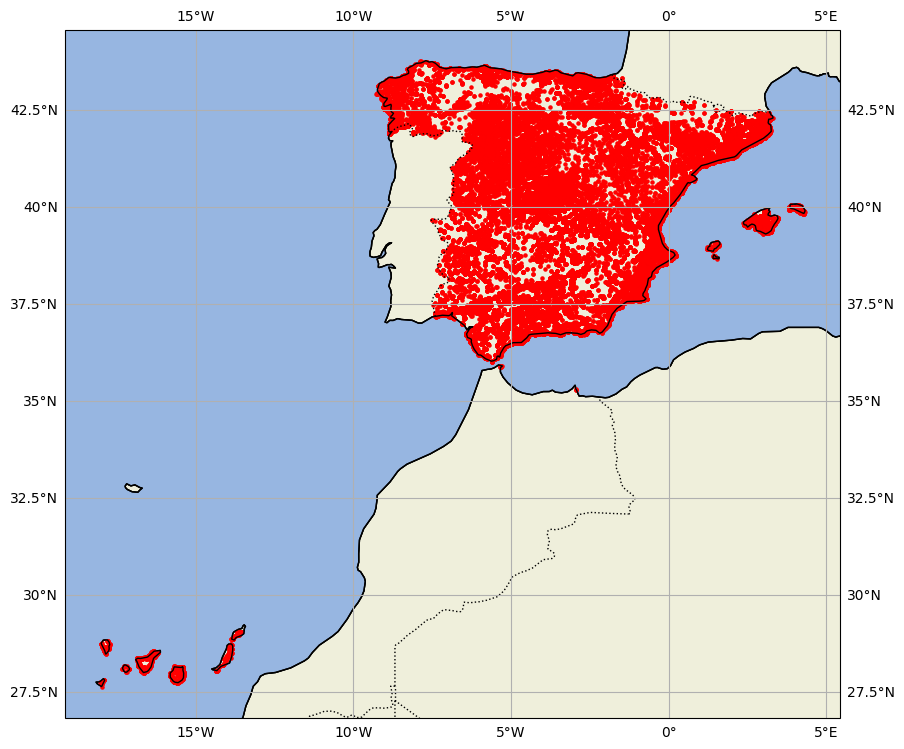

In [2]:
## Plot the points on a map
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
import pandas as pd

gdf1 = gpd.read_file('../data/centroids.geojson')
gdf2 = gpd.read_file('../data/spain.geojson')

gdf = gpd.GeoDataFrame(pd.concat([gdf1, gdf2], ignore_index=True))

# Create a map with Cartopy
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)
# Plot the points
gdf.plot(ax=ax, color='red', markersize=5, label='Centroids')
# Add basemap
import cartopy.feature as cfeature
ax.add_feature(cfeature.LAND, edgecolor='black')
# Add political boundaries
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')
# Add water bodies
ax.add_feature(cfeature.OCEAN, edgecolor='black')
# Add a title and legend

In [21]:
### Copy the files from folder to another folder
import pathlib
S2_FOLDER = pathlib.Path('../data/s1')
s2_files = sorted(list(S2_FOLDER.glob('*.tif')))

## Get the last s2 file
last_s2_file = s2_files[-1]
print(last_s2_file)
print(len(s2_files))

../data/s1/s1_41734.tif
39877


In [22]:
# Files to copy
s2_files_tocopy = sorted(list(Path('../data/tfm_datasetv2/s1').glob('*.tif')))

# Change the name of each files using shutil
import shutil
for i, s2_file in enumerate(s2_files_tocopy):
    new_name = f"s1_{41735 + i}.tif"
    new_path = S2_FOLDER / new_name
    shutil.copy(s2_file, new_path)
    print(f"Copied {s2_file} to {new_path}")


Copied ../data/tfm_datasetv2/s1/s1__00000.tif to ../data/s1/s1_41735.tif
Copied ../data/tfm_datasetv2/s1/s1__00001.tif to ../data/s1/s1_41736.tif
Copied ../data/tfm_datasetv2/s1/s1__00002.tif to ../data/s1/s1_41737.tif
Copied ../data/tfm_datasetv2/s1/s1__00003.tif to ../data/s1/s1_41738.tif
Copied ../data/tfm_datasetv2/s1/s1__00005.tif to ../data/s1/s1_41739.tif
Copied ../data/tfm_datasetv2/s1/s1__00006.tif to ../data/s1/s1_41740.tif
Copied ../data/tfm_datasetv2/s1/s1__00007.tif to ../data/s1/s1_41741.tif
Copied ../data/tfm_datasetv2/s1/s1__00008.tif to ../data/s1/s1_41742.tif
Copied ../data/tfm_datasetv2/s1/s1__00009.tif to ../data/s1/s1_41743.tif
Copied ../data/tfm_datasetv2/s1/s1__00010.tif to ../data/s1/s1_41744.tif
Copied ../data/tfm_datasetv2/s1/s1__00011.tif to ../data/s1/s1_41745.tif
Copied ../data/tfm_datasetv2/s1/s1__00015.tif to ../data/s1/s1_41746.tif
Copied ../data/tfm_datasetv2/s1/s1__00016.tif to ../data/s1/s1_41747.tif
Copied ../data/tfm_datasetv2/s1/s1__00017.tif to ..

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.068..1.566].


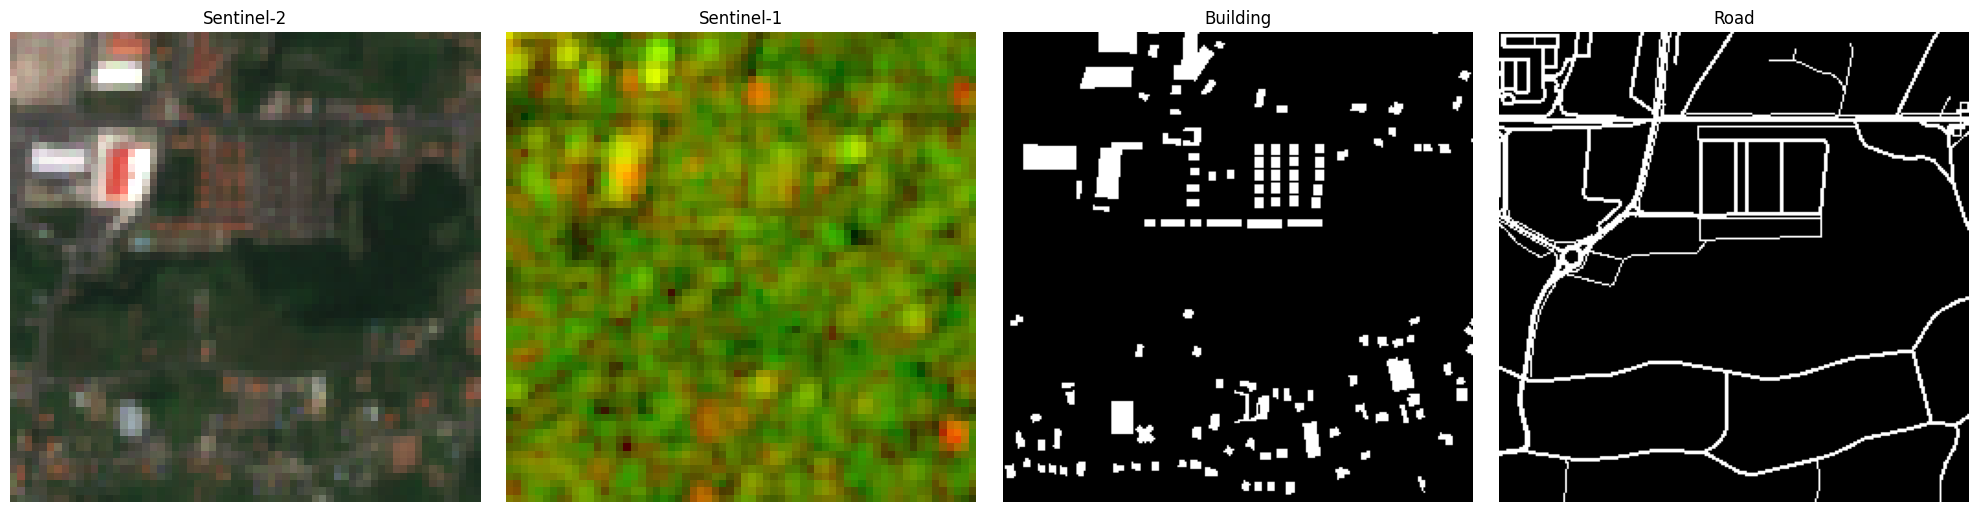

In [1]:
## Plotear S2, S1, Building y Road
import pathlib
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

s2_files = sorted(list(pathlib.Path('../dataset_brcd/s2').glob('*.tif')))
s1_files = sorted(list(pathlib.Path('../dataset_brcd/s1').glob('*.tif')))
building_files = sorted(list(pathlib.Path('../dataset_brcd/building').glob('*.tif')))
road_files = sorted(list(pathlib.Path('../dataset_brcd/road').glob('*.tif')))

# ## Get the first one
IDX = 200
s2_file = s2_files[IDX]
s1_file = s1_files[IDX]
building_file = building_files[IDX]
road_file = road_files[IDX]

# PLot
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
with rio.open(s2_file) as src1:
    s2_data = src1.read()
    ax[0].imshow(s2_data[:3].transpose(1, 2, 0) * 2.5/ 10_000)
    ax[0].set_title('Sentinel-2')

with rio.open(s1_file) as src:
    s1_data = src.read()
    # Add a thrid dimension for RGB visualization
    b1 = s1_data[0]  # VV
    b2 = s1_data[1]  # VH
    def normalize(b):
        return (b - np.min(b)) / (np.max(b) - np.min(b))

    b1 = normalize(b1)
    b2 = normalize(b2)

    # Crear imagen RGB donde R = banda_1, G = banda_2, B = 0
    rgb_img = np.stack([b1, b2, np.zeros_like(b1)], axis=-1)

    ax[1].imshow(rgb_img)
    ax[1].set_title('Sentinel-1')

with rio.open(building_file) as src:
    building_data = src.read(1)
    ax[2].imshow(building_data, cmap='gray')
    ax[2].set_title('Building')

with rio.open(road_file) as src:
    road_data = src.read(1)
    ax[3].imshow(road_data, cmap='gray')
    ax[3].set_title('Road')

for a in ax:
    a.axis('off')

plt.tight_layout()

In [ ]:
## Rename the files S2 and S1
import pathlib
DB_FOLDER = pathlib.Path("../brcd")
S2_DIR = DB_FOLDER / "s2"
S1_DIR = DB_FOLDER / "s1"

## Change the names of the files
s1_files = sorted(list(S1_DIR.glob("*.tif")))
s2_files = sorted(list(S2_DIR.glob("*.tif")))

for i, (s1_file, s2_file) in enumerate(zip(s1_files, s2_files)):
    # Get the base name without extension
    s1_name = s1_file.stem.split('__')[0] + "__" + str(s1_file.stem.split('__')[1]).zfill(5)
    s2_name = s2_file.stem.split('__')[0] + "__" + str(s2_file.stem.split('__')[1]).zfill(5)
    
    # Rename S1 file
    new_s1_name = S1_DIR / f"{s1_name}.tif"
    s1_file.rename(new_s1_name)
    
    # Rename S2 file
    new_s2_name = S2_DIR / f"{s2_name}.tif"
    s2_file.rename(new_s2_name)

    print(f"[{i+1}/{len(s1_files)}] Renamed {s1_file.name} to {new_s1_name.name} and {s2_file.name} to {new_s2_name.name}")

In [ ]:
from overturemaps import core
import rasterio as rio
from rasterio.features import rasterize
import pyproj
from shapely.geometry import box
from multiprocessing import Pool

## Right buffer dict
buffer_dict = {
    'motorway': 3.5,
    'motorway_link': 2.5,
    'trunk': 3.5,
    'trunk_link': 2.5,
    'primary': 3.5,
    'primary_link': 2.5,
    'secondary': 3.5,
    'secondary_link': 2.5,
    'tertiary': 3.5,
    'tertiary_link': 2.5,
    'residential': 2.5,
    'living_street': 2.5,
    'unclassified': 1.25,
    'pedestrian': 1.25,
    'footway': 1.25,
    'cycleway': 1.25,
    'service': 2.5,
    'steps': 1.25,
    'path': 1.25,
    'track': 1.25,
    'bridleway': 1.25,
    'busway': 2.5,
    'unknown': 1.25
}

def create_masks(s2_path, out_tif_building, out_tif_road):
    try:
        if pathlib.Path(out_tif_building).exists() and pathlib.Path(out_tif_road).exists():
            print(f"{out_tif_building.name} and {out_tif_road.name} exist, skipping...")
            return None
        else:
            with rio.open(s2_path) as src:
                minx, miny, maxx, maxy = src.bounds
                # Convert the bounding box to WGS84
                transformer = pyproj.Transformer.from_crs(src.crs, "EPSG:4326", always_xy=True)
                minx_wgs, miny_wgs = transformer.transform(minx, miny)
                maxx_wgs, maxy_wgs = transformer.transform(maxx, maxy)

                BBOX_WGS84 = (minx_wgs, miny_wgs, maxx_wgs, maxy_wgs)

                building_gdf = core.geodataframe("building", bbox=BBOX_WGS84)
                building_gdf.crs = "EPSG:4326"

                road_gdf = core.geodataframe("segment", bbox=BBOX_WGS84)
                road_gdf.crs = "EPSG:4326"

                # Reproject to UTM coordinates and clip to the bounding box
                building_gdf = building_gdf.to_crs(src.crs)
                building_gdf = building_gdf[building_gdf.geometry.intersects(box(minx, miny, maxx, maxy))]

                # Exclude all building with area less than 100 m2
                building_gdf = building_gdf[building_gdf.geometry.area > 100]
                
                # Bufferization of roads
                road_gdf = road_gdf.to_crs(src.crs)
                road_gdf = road_gdf[road_gdf.geometry.intersects(box(minx, miny, maxx, maxy))]
                road_gdf['buffer'] = road_gdf['class'].map(buffer_dict).fillna(1.25)

                # Change the geometry to buffer
                road_gdf['geometry'] = road_gdf.apply(lambda row: row['geometry'].buffer(row['buffer']), axis=1)
                
                # New geotransform
                new_transform = rio.Affine(2.5, 0, minx, 0, -2.5, maxy)
                
                # Rasterize the buildings
                building_raster = rasterize(
                    [(geom, 1) for geom in building_gdf.geometry],
                    out_shape=(256,256),
                    transform=new_transform,
                    fill=0,
                    dtype='uint8'
                )

                # Rasterize the roads with buffers
                road_raster = rasterize(
                    [(geom, 1) for geom in road_gdf.geometry],
                    out_shape=(256,256),
                    transform=new_transform,
                    fill=0,
                    dtype='uint8'
                )

                # Save the rasterized buildings
                with rio.open(out_tif_building, 'w', driver='GTiff',
                            height=256,
                            width=256,
                            count=1, dtype='uint8',
                            crs=src.crs, transform=new_transform) as dst:
                    dst.write(building_raster, 1)

                # Save the rasterized roads
                with rio.open(out_tif_road, 'w', driver='GTiff',
                            height=256,
                            width=256,
                            count=1, dtype='uint8',
                            crs=src.crs, transform=new_transform) as dst:
                    dst.write(road_raster, 1)
    except Exception as e:
        print(f"Error processing {s2_path}: {e}")
        return None

def parallel_create_masks(pairs, processes=16):
    """
    Run create_building_mask in parallel.

    Parameters
    ----------
    pairs : list of (s2_path, out_tif)
        List of input/output path tuples.
    processes : int, optional
        Number of parallel worker processes.
    """
    with Pool(processes) as pool:
        pool.starmap(create_masks, pairs)

In [38]:
# === Notebook usage ===
from pathlib import Path

DB_FOLDER = Path("../brcd")
S2_DIR = DB_FOLDER / "s2"

BUILD_DIR = DB_FOLDER / "building"
BUILD_DIR.mkdir(parents=True, exist_ok=True)

ROAD_DIR = DB_FOLDER / "road"
ROAD_DIR.mkdir(parents=True, exist_ok=True)

# Gather S2 files and prepare pairs
s2_files = sorted(S2_DIR.glob("*.tif"))
pairs = [
    (str(s2), str(BUILD_DIR / f"building__{s2.name.split('__')[1]}"), 
     str(ROAD_DIR / f"road__{s2.name.split('__')[1]}"))
    for s2 in s2_files
]

parallel_create_masks(pairs)

In [ ]:
## Load two large geojson files and create a GeoDataFrame
import geopandas as gpd
import pathlib 

building_gdf = gpd.read_file("/home/tidop/masterIA/TFM_BRCD/brcd_data/building_spain.geojson")
road_gdf = gpd.read_file("/home/tidop/masterIA/TFM_BRCD/brcd_data/road_spain.geojson")

In [ ]:
print(f"Building GeoDataFrame CRS: {building_gdf.crs}")
print(f"Roads GeoDataFrame CRS: {road_gdf.crs}")

In [ ]:
## How to know the type of geometry in a GeoDataFrame
print(f"Building GeoDataFrame Geometry Type: {building_gdf.geom_type.unique()}")
print(f"Roads GeoDataFrame Geometry Type: {road_gdf.geom_type.unique()}")

In [ ]:
## Right buffer dict
buffer_dict = {
    'motorway': 3.5,
    'motorway_link': 2.5,
    'trunk': 3.5,
    'trunk_link': 2.5,
    'primary': 3.5,
    'primary_link': 2.5,
    'secondary': 3.5,
    'secondary_link': 2.5,
    'tertiary': 3.5,
    'tertiary_link': 2.5,
    'residential': 2.5,
    'living_street': 2.5,
    'unclassified': 0,
    'pedestrian': 1.25,
    'footway': 1.25,
    'cycleway': 1.25,
    'service': 2.5,
    'steps': 1.25,
    'path': 1.25,
    'track': 1.25,
    'track_grade1': 1.25,
    'track_grade2': 1.25,
    'track_grade3': 1.25,
    'track_grade4': 1.25,
    'track_grade5': 1.25,
    'bridleway': 1.25,
    'busway': 2.5,
    'unknown': 0
}
road_gdf['buffer_radius'] = road_gdf['fclass'].map(buffer_dict)

In [ ]:
## Make the building and road rasterized
s2_files = pathlib.Path('../brcdv2/s2').glob('*.tif')
s2_files = sorted(list(s2_files))

import rasterio as rio
from rasterio.features import rasterize
import pyproj
from shapely.geometry import box

for i, s2_file in enumerate(s2_files):
    with rio.open(s2_file) as src:
        name = "_".join(s2_file.stem.split('_')[1:])  # Extract name from the file stem
        # Extract the bounds of the raster file
        bounds = src.bounds
        ulx, uly = bounds.left, bounds.top

        # Convert to bounds to godataframe and reproject to the same CRS as the rois
        bounds_gdf = gpd.GeoDataFrame(geometry=[box(*bounds)], crs=src.crs)

        # Convert to WGS84
        bounds_gdf = bounds_gdf.to_crs(epsg=4326)

        # Clip building and roads
        clipped_building = gpd.clip(building_gdf, bounds_gdf)
        clipped_roads = gpd.clip(road_gdf, bounds_gdf)

        # Reproject again to the same CRS as the raster file
        clipped_building = clipped_building.to_crs(src.crs)
        clipped_roads = clipped_roads.to_crs(src.crs)

        ## Add a buffer of 2.5m
        clipped_roads['geometry'] = clipped_roads.geometry.buffer(clipped_roads['buffer_radius'])


        # Get new transform with 2.5m resolution
        ulx_geo = bounds_gdf.geometry.bounds.minx[0]
        uly_geo = bounds_gdf.geometry.bounds.maxy[0]

        # Convert the upper left corner to the raster's coordinate system
        new_transform = rio.Affine(2.5, 0, ulx, 0, -2.5, uly)
        out_shape = (256,256)

        # Count the number of records in roads and buildings
        num_buildings = len(clipped_building)
        num_roads = len(clipped_roads)

        print(f'Processing {name}: {num_buildings} buildings, {num_roads} roads')

        # Rasterize the clipped buildings and roads
        building_raster = rasterize(
            [(geom, 1) for geom in clipped_building.geometry],
            out_shape=out_shape,
            transform=new_transform,
            fill=0,
            dtype='uint8'
        )

        # Rasterize the clipped roads
        road_raster = rasterize(
            [(geom, 1) for geom in clipped_roads.geometry],
            out_shape=out_shape,
            transform=new_transform,
            fill=0,
            dtype='uint8'
        )

        # Create folders
        building_folder = pathlib.Path('../brcdv2/building')
        road_folder = pathlib.Path('../brcdv2/road')

        building_folder.mkdir(parents=True, exist_ok=True)
        road_folder.mkdir(parents=True, exist_ok=True)

        # Save the rasterized buildings and roads
        building_raster_path = building_folder / f'building_{name}.tif'  
        road_raster_path = road_folder / f'road_{name}.tif'

        with rio.open(building_raster_path, 'w', driver='GTiff',
                     height=building_raster.shape[0],
                     width=building_raster.shape[1],
                     count=1, dtype='uint8',
                     crs=src.crs, transform=new_transform) as dst:
                dst.write(building_raster, 1)

        with rio.open(road_raster_path, 'w', driver='GTiff',
                        height=road_raster.shape[0],
                        width=road_raster.shape[1],
                        count=1, dtype='uint8',
                        crs=src.crs, transform=new_transform) as dst:
                    dst.write(road_raster, 1)

        print(f'Processed {i+1}/{len(s2_files)}: {name}')
    

In [ ]:
import pyproj
import pathlib
import rasterio as rio
from shapely.geometry import box

DB_FOLDER = pathlib.Path("/home/tidop/masterIA/TFM_BRCD/brcdv2")
s2_files = sorted(list((DB_FOLDER / "s2").glob("*.tif")))

s2_valid_files = []
for i, s2_file in enumerate(s2_files):
    with rio.open(s2_file) as src:
        name = s2_file.stem.split('_')[1]
        # Extract the bounds of the raster file
        bounds = src.bounds

        # Convert to bounds to godataframe and reproject to the same CRS as the rois
        bounds_gdf = gpd.GeoDataFrame(geometry=[box(*bounds)], crs=src.crs)

        # Convert to WGS84
        bounds_gdf = bounds_gdf.to_crs(epsg=4326)

        # Clip building and roads
        clipped_building = gpd.clip(building_gdf, bounds_gdf)
        clipped_roads = gpd.clip(road_gdf, bounds_gdf)    

        # Reproject againb to the same CRS as the raster file
        clipped_building = clipped_building.to_crs(src.crs)
        clipped_roads = clipped_roads.to_crs(src.crs)
        buffered_roads = clipped_roads.copy()
        buffered_roads['geometry'] = buffered_roads.geometry.buffer(buffered_roads['buffer_radius'])

        print(f"CRS Building: {clipped_building.crs.to_string()}")
        print(f"CRS Roads: {buffered_roads.crs.to_string()}")

        # # Get new transform with 2.5m resolution
        # ulx_geo = bounds_gdf.geometry.bounds.minx[0]
        # uly_geo = bounds_gdf.geometry.bounds.maxy[0]

        # # Convert the upper left corner to the raster's coordinate system
        # transformer = pyproj.Transformer.from_crs("EPSG:4326", src.crs, always_xy=True)
        # ulx, uly = transformer.transform(ulx_geo, uly_geo)

        # new_transform = rio.Affine(2.5, 0, ulx, 0, -2.5, uly)
        # out_shape = (256,256)

        # Count the number of records in roads and buildings
        num_buildings = len(clipped_building)
        num_roads = len(buffered_roads)

        print(f'Processing {name}: {num_buildings} buildings, {num_roads} roads')

        # Calculate the area of buildings and roads
        # Note: The area is calculated in the CRS of the raster file, which is usually
        # in meters, so the area will be in square meters.
        # Dissolve the geometries to get the total area
        area_building = clipped_building.dissolve().geometry.area.sum()
        area_roads = buffered_roads.geometry.area.sum()

        # From the bounds, calculate the total area
        area_total = 640 * 640  # Assuming the raster is 640x640 pixels with a resolution of 2.5m

        building_percent = (area_building / area_total) * 100
        road_percent = (area_roads / area_total) * 100
        print(f'Area: {area_building:.2f} ({building_percent:.2f}%), '
              f'{area_roads:.2f} ({road_percent:.2f}%)')

        if building_percent < 1.5 and road_percent < 3.5:
            print(f'No buildings or roads found for {name}, skipping...')
            continue
        else:
            s2_valid_files.append(s2_file)
        
        print(f'Processed {i+1}/{len(s2_files)}: {name}')

In [ ]:
from overturemaps import core
import rasterio as rio
from rasterio.features import rasterize
import pyproj
from shapely.geometry import box

def create_building_mask(s2_path, out_tif):
    with rio.open(s2_path) as src:

        minx, miny, maxx, maxy = src.bounds
        # Convert the bounding box to WGS84
        transformer = pyproj.Transformer.from_crs(src.crs, "EPSG:4326", always_xy=True)
        minx_wgs, miny_wgs = transformer.transform(minx, miny)
        maxx_wgs, maxy_wgs = transformer.transform(maxx, maxy)

        BBOX_WGS84 = (minx_wgs, miny_wgs, maxx_wgs, maxy_wgs)

        gdf = core.geodataframe("building", bbox=BBOX_WGS84)
        gdf.crs = "EPSG:4326"

        # Reproject to UTM coordinates and clip to the bounding box
        gdf = gdf.to_crs(src.crs)
        gdf = gdf[gdf.geometry.intersects(box(minx, miny, maxx, maxy))]
        # If the geometry is more than 100 m2
        gdf = gdf[gdf.geometry.area > 100]

        # Rasterize the buildings
        building_raster = rasterize(
            [(geom, 1) for geom in gdf.geometry],
            out_shape=src.shape,
            transform=src.transform,
            fill=0,
            dtype='uint8'
        )

        # New geotransform
        ulx, uly = minx, maxy
        new_transform = rio.Affine(2.5, 0, ulx, 0, -2.5, uly)

        # Save the rasterized buildings
        with rio.open(out_tif, 'w', driver='GTiff',
                     height=256,
                     width=256,
                     count=1, dtype='uint8',
                     crs=src.crs, transform=new_transform) as dst:
            dst.write(building_raster, 1)    

In [ ]:
# Cell imports
from pathlib import Path
from multiprocessing import Pool
import rasterio as rio
from rasterio.features import rasterize
from shapely.geometry import box
from overturemaps import core
import pyproj
from functools import lru_cache

# Apply buffer
buffer_sizes = {
"motorway": 3.5
"trunk": 3.5
"primary": 3.5, #3
"secondary": 3.5, #4
"tertiary": 3.5, #5
"residential": 2.5, #6
"living_street": 2.5, #7
"service": 2.5, #8
"pedestrian": 1.25, #9
"footway": 1.25, #10
"steps": 1.25, #11
"track": 2.5, #12
"cycleway": 2.5, #13
"path": 1.25, #14
"bridleway": 1.25, #15    
} # 15 classes


@lru_cache(maxsize=1)
def _get_transformer(src_crs):
    """Cache CRS transformer"""
    return pyproj.Transformer.from_crs(src_crs, 'EPSG:4326', always_xy=True)


def create_building_mask(s2_path, out_tif, resolution=2.5):
    """
    Rasterize MS building footprints into a mask matching an S2 tile.

    Parameters
    ----------
    s2_path : Path or str
        Path to input Sentinel-2 GeoTIFF tile.
    out_tif : Path or str
        Path to output building mask GeoTIFF.
    resolution : float, optional
        Pixel resolution in meters (default is 2.5).
    """
    s2_path = Path(s2_path)
    out_path = Path(out_tif)

    # 1) Read bounds and CRS
    with rio.open(s2_path) as src:
        left, bottom, right, top = src.bounds
        src_crs = src.crs

    # 2) Transform bounds to WGS84
    transformer = _get_transformer(src_crs)
    minx_wgs, miny_wgs = transformer.transform(left, bottom)
    maxx_wgs, maxy_wgs = transformer.transform(right, top)

    # 3) Fetch building footprints
    gdf = core.geodataframe('segment', bbox=(minx_wgs, miny_wgs, maxx_wgs, maxy_wgs))
    if gdf.crs is None or gdf.crs.to_epsg() != 4326:
        gdf.set_crs(4326, inplace=True)

    # 4) Reproject to tile CRS and clip
    gdf = gdf.to_crs(src_crs)
    gdf['buffer_radius'] = gdf['class'].map(buffer_dict)
    
    # If class NULL, set buffer radius to 0
    gdf['buffer_radius'] = gdf['buffer_radius'].fillna(0)
    
    tile_poly = box(left, bottom, right, top)
    gdf = gdf[gdf.geometry.intersects(tile_poly)]
  

    # 5) Rasterize
    width, height = 256, 256
    transform = rio.transform.from_origin(left, top, resolution, resolution)

    mask = rasterize(
        ((geom, 1) for geom in gdf.geometry),
        out_shape=(height, width),
        transform=transform,
        fill=0,
        dtype='uint8'
    )

    # 6) Write mask
    out_path.parent.mkdir(parents=True, exist_ok=True)
    with rio.open(
        out_path, 'w', driver='GTiff',
        height=height, width=width, count=1,
        dtype='uint8', crs=src_crs, transform=transform,
        compress='lzw'
    ) as dst:
        dst.write(mask, 1)


def parallel_create_masks(pairs, processes=16):
    """
    Run create_building_mask in parallel.

    Parameters
    ----------
    pairs : list of (s2_path, out_tif)
        List of input/output path tuples.
    processes : int, optional
        Number of parallel worker processes.
    """
    with Pool(processes) as pool:
        pool.starmap(create_building_mask, pairs)

In [ ]:
# === Notebook usage ===
from pathlib import Path

DB_FOLDER = Path("/home/tidop/masterIA/TFM_BRCD/brcd")
S2_DIR = DB_FOLDER / "s2"
OUT_DIR = DB_FOLDER / "building"
OUT_DIR.mkdir(parents=True, exist_ok=True)

# Gather S2 files and prepare pairs
s2_files = sorted(S2_DIR.glob("*.tif"))
pairs = [
    (str(s2), str(OUT_DIR / f"building_{'_'.join(s2.stem.split('_')[1:])}.tif"))
    for s2 in s2_files
]

use_parallel = True  # set False to run sequentially
if use_parallel:
    parallel_create_masks(pairs)
else:
    for i, (in_tif, out_tif) in enumerate(pairs, 1):
        out_path = Path(out_tif)
        if out_path.exists():
            print(f"{out_path.name} exists, skipping...")
            continue
        try:
            create_building_mask(in_tif, out_tif)
            print(f"Processed {i}/{len(pairs)}: {out_path.name}")
        except Exception as e:
            print(f"Error on {out_path.name}: {e}")

In [ ]:
# Get the centroids from the s2 files
import pathlib
import pyproj
s2_path = pathlib.Path("/media/tidop/Datos_4TB/databases/RRSGANv2/s2")
s2_files = sorted(list(s2_path.glob("*.tif")))

centroids = []
# Get the centroid
import rasterio as rio
for i, s2_file in enumerate(s2_files):
    with rio.open(s2_file) as src:
        bounds = src.bounds
        name = "RRSGAN_" + s2_file.stem
        centroid_x = (bounds.left + bounds.right) / 2
        centroid_y = (bounds.top + bounds.bottom) / 2

        # Convert to WGS84
        transformer = pyproj.Transformer.from_crs(src.crs, "EPSG:4326", always_xy=True)
        centroid_x, centroid_y = transformer.transform(centroid_x, centroid_y)
        centroids.append((name, centroid_x, centroid_y))

        print(f'Processed {i+1}/{len(s2_files)}: {name} - Centroid: ({centroid_x}, {centroid_y})')

# centroids_df = pd.DataFrame(centroids, columns=['name', 'centroid_x', 'centroid_y'])
# # Delete if has duplicated coordinates
# centroids_df = centroids_df.drop_duplicates(subset=['centroid_x', 'centroid_y'], keep='first')

# centroids_df

In [ ]:
## Convert to geodataframe and export as a GeojSON
import geopandas as gpd
centroids_gdf = gpd.GeoDataFrame(
    centroids, 
    columns=['name', 'centroid_x', 'centroid_y'],
    geometry=gpd.points_from_xy([c[1] for c in centroids], [c[2] for c in centroids]),
    crs="EPSG:4326"
)

centroids_gdf.to_file("../brcdv2/centroids.geojson", driver='GeoJSON')

In [ ]:
import rasterio as rio
from rasterio.features import rasterize
from shapely.geometry import box
from overturemaps import core
import pyproj
from functools import lru_cache

def create_building_mask(
    s2_path: str,
    out_tif: str,
    resolution: float = 2.5
) -> 'gpd.GeoDataFrame':
    """
    Rasterize MS building footprints into a mask matching an S2 tile.

    Parameters
    ----------
    s2_path : str
        Sentinel-2 tile GeoTIFF path (in UTM).
    out_tif : str
        Output path for the building mask GeoTIFF.
    resolution : float, optional
        Pixel size in meters for the output mask. Defaults to 2.5.

    Returns
    -------
    gpd.GeoDataFrame
        Clipped building footprints in the tile CRS.
    """
    # open S2 tile and get bounds/CRS
    with rio.open(s2_path) as src:
        left, bottom, right, top = src.bounds
        src_crs = src.crs

    # prepare transformer to WGS84, cached for reuse
    @lru_cache(maxsize=1)
    def _get_transformer(crs):
        return pyproj.Transformer.from_crs(crs, 'EPSG:4326', always_xy=True)
    transformer = _get_transformer(src_crs)

    # compute WGS84 bbox
    minx_wgs, miny_wgs = transformer.transform(left, bottom)
    maxx_wgs, maxy_wgs = transformer.transform(right, top)
    wgs_bbox = (minx_wgs, miny_wgs, maxx_wgs, maxy_wgs)

    # fetch raw footprints in WGS84
    gdf = core.geodataframe('building', bbox=wgs_bbox)
    # ensure correct CRS
    if gdf.crs is None or gdf.crs.to_epsg() != 4326:
        gdf.set_crs(4326, inplace=True)

    # reproject to tile CRS
    gdf = gdf.to_crs(src_crs)
    # clip to tile extent
    tile_poly = box(left, bottom, right, top)
    gdf = gdf[gdf.geometry.intersects(tile_poly)].copy()

    # prepare output raster dims & transform
    width = 256
    height = 256
    transform = rio.transform.from_origin(left, top, resolution, resolution)

    # rasterize
    mask = rasterize(
        ((geom, 1) for geom in gdf.geometry),
        out_shape=(height, width),
        transform=transform,
        fill=0,
        dtype='uint8'
    )

    # write mask
    profile = {
        'driver': 'GTiff',
        'height': height,
        'width': width,
        'count': 1,
        'dtype': 'uint8',
        'crs': src_crs,
        'transform': transform,
        'compress': 'lzw'
    }
    with rio.open(out_tif, 'w', **profile) as dst:
        dst.write(mask, 1)


In [ ]:
import pathlib
DB_FOLDER = pathlib.Path("/home/tidop/masterIA/TFM_BRCD/brcdv2")
s2_files = sorted(list((DB_FOLDER / "s2").glob("*.tif")))
for i, s2_file in enumerate(s2_files):
    name = "_".join(s2_file.stem.split('_')[1:])  # Extract name from the file stem
    out_tif = DB_FOLDER / "building" / f"building_{name}.tif"
    if out_tif.exists():
        print(f"Building mask already exists for {name}, skipping...")
        continue
    try:
        create_building_mask(
            s2_path=str(s2_file),
            out_tif=str(out_tif)
        )
        print(f"Successfully created building mask for {name}")
    except Exception as e:
        print(f"Failed to create building mask for {name}: {e}")

    print(f'Processed {i+1}/{len(s2_files)}: {name}')

In [ ]:
## Copy the valid files to a new folder
import shutil
output_folder = DB_FOLDER.parent / "brcdv2"
output_folder.mkdir(parents=True, exist_ok=True)

# cREATE S2 and S1 SUBFOLDERS
s2_output_folder = output_folder / "s2"
s2_output_folder.mkdir(parents=True, exist_ok=True)
s1_output_folder = output_folder / "s1"
s1_output_folder.mkdir(parents=True, exist_ok=True)

for i, s2_file in enumerate(s2_valid_files):
    s1_file = s2_file.parent.parent / "s1" / s2_file.name.replace("s2", "s1")
    if s1_file.exists():
        shutil.copy(s2_file, s2_output_folder / s2_file.name)
        shutil.copy(s1_file, s1_output_folder / s1_file.name)
        print(f'[{i+1}/{len(s2_valid_files)}] Copied {s2_file.name} and {s1_file.name} to {s2_output_folder} and {s1_output_folder}')

In [ ]:
import geopandas as gpd
## Clip the following rasters in the feature asigned to the follwwing rois
rois_barcelona = gpd.read_file("../brcdv2/aoi_barcelona.geojson")
rois_madrid = gpd.read_file("../brcdv2/aoi_madrid.geojson")

In [ ]:
import rasterio as rio
import rasterio.mask as rio_mask
from shapely.geometry import box
from shapely.geometry import Polygon
import pyproj
from pyproj.aoi import AreaOfInterest
from pyproj.database import query_utm_crs_info
import pathlib

# ---- File paths ----
s2_file = "/home/tidop/Descargas/s2europe_large/s2europe/Barcelona_s2.tif"
s1_file = "/home/tidop/Descargas/s2europe_large/s2europe/Barcelona_s1.tif"
output_folder = pathlib.Path("../brcdv2")
(output_folder / "s2").mkdir(parents=True, exist_ok=True)
(output_folder / "s1").mkdir(parents=True, exist_ok=True)

# --- Assume rois_barcelona is a GeoDataFrame in EPSG:4326 ---

with rio.open(s2_file) as s2, rio.open(s1_file) as s1:
    for i, row in rois_barcelona.iterrows():
        s2_name = f"s2_barcelona_{str(i).zfill(4)}.tif"
        s1_name = f"s1_barcelona_{str(i).zfill(4)}.tif"

        # --------- Get centroid of AOI ---------
        centroid = row.geometry.centroid
        center_lon, center_lat = centroid.x, centroid.y

        # --------- Calculate UTM CRS code for this AOI ---------
        utm_list = query_utm_crs_info(
            datum_name='WGS 84',
            area_of_interest=AreaOfInterest(
                west_lon_degree=row.geometry.bounds[0],
                south_lat_degree=row.geometry.bounds[1],
                east_lon_degree=row.geometry.bounds[2],
                north_lat_degree=row.geometry.bounds[3]
            )
        )
        utm_crs = f"EPSG:{utm_list[0].code}"

        # --------- Project centroid to UTM ---------
        transformer = pyproj.Transformer.from_crs("EPSG:4326", utm_crs, always_xy=True)
        center_x, center_y = transformer.transform(center_lon, center_lat)

        # --------- Create 640x640m square in UTM, centered at centroid ---------
        half_size = 320  # half of 640m
        square_utm = [
            (center_x - half_size, center_y - half_size),  # Bottom left
            (center_x + half_size, center_y - half_size),  # Bottom right
            (center_x + half_size, center_y + half_size),  # Top right
            (center_x - half_size, center_y + half_size),  # Top left
            (center_x - half_size, center_y - half_size)   # Closing the square
        ]

        # --------- Project square back to raster CRS if necessary ---------
        reverse_transformer = pyproj.Transformer.from_crs(utm_crs, "EPSG:4326", always_xy=True)
        lonlat_coords = [
            reverse_transformer.transform(x, y) for x, y in square_utm
        ]
        # Convert to polygon
        square_poly = Polygon(lonlat_coords)
        
        # --------- Mask with the square polygon ---------
        s2_clipped, _ = rio_mask.mask(s2, [square_poly], crop=True, all_touched=True, pad=True)
        s1_clipped, _ = rio_mask.mask(s1, [square_poly], crop=True, all_touched=True, pad=True)

        # --------- Band order (if needed) ---------
        s2_clipped = s2_clipped[[2,1,0,3,4,5]]
        # Get the S2 and S1 for 64x64 starting from center

        # Reproject the raster to the UTM CRS using rasterio's warp

        # Index of the center of the array
        # center_index = s2_clipped.shape[1] // 2
        # s2_patched = s2_clipped[:, center_index-32:center_index+32, center_index-32:center_index+32]
        # s1_patched = s1_clipped[:, center_index-32:center_index+32, center_index-32:center_index+32]

        # --------- Output UTM transform ---------
        # Reconvert the ulx, uly from the square utm coordinates
        minx, maxy = square_utm[3]

        new_transform = rio.Affine(10, 0, minx, 0, -10, maxy)  # 10m pixels, upper left origin

        # --------- Update profile with UTM crs and new transform ---------
        out_width = out_height = 64  # 640m / 10m

        s2_profile = s2.profile.copy()
        s2_profile.update({
            'transform': new_transform,
            'crs': utm_crs,
            'width': out_width,
            'height': out_height
        })
        s1_profile = s1.profile.copy()
        s1_profile.update({
            'transform': new_transform,
            'crs': utm_crs,
            'width': out_width,
            'height': out_height
        })

        # --------- Save outputs ---------
        s2_output_file = output_folder / "s2" / s2_name
        s1_output_file = output_folder / "s1" / s1_name

        with rio.open(s2_output_file, 'w', **s2_profile) as dst:
            dst.write(s2_clipped)
        with rio.open(s1_output_file, 'w', **s1_profile) as dst:
            dst.write(s1_clipped)

        print(f'[{i+1}/{len(rois_barcelona)}] Clipped square at centroid to {s2_output_file}, {s1_output_file}')

In [ ]:
## Plot S2, S1, Building, Road, and BR
import torch
import rasterio as rio
import pathlib
import matplotlib.pyplot as plt


def plot_raster_with_buildings_roads(s2_file, s1_file, building_file, road_file):
    name = "_".join(s2_file.stem.split('_')[1:])  # Extract name from the file stem
    with rio.open(s2_file) as s2, rio.open(s1_file) as s1, rio.open(building_file) as building, rio.open(road_file) as road:
        s2_data = s2.read()
        s1_data = s1.read()
        building_data = building.read(1)
        road_data = road.read(1)

        ## Plot
        fig, axs = plt.subplots(1, 5, figsize=(15, 10))
        axs[0].imshow(s2_data[:3].transpose(1, 2, 0) * 2.5 / 10000)
        axs[0].set_title('S2 RGB')

        axs[1].imshow(s1_data[0], cmap='gray')
        axs[1].set_title('S1 VV')

        axs[2].imshow(building_data, cmap='gray')
        axs[2].set_title('Buildings')

        axs[3].imshow(road_data, cmap='gray')
        axs[3].set_title('Roads')

        ## Reshape S2 using PyTorch
        torch_s2_data = torch.tensor(s2_data[:3]).float()  # Select RGB bands
        torch_s2_data = torch_s2_data.unsqueeze(0) / 10000  # Add batch dimension and normalize
        s2_resized = torch.nn.functional.interpolate(
            torch_s2_data, size=(256, 256), mode='bilinear', align_corners=False
        ).squeeze(0)  # Remove batch dimension after resizing

        axs[4].imshow(s2_resized.permute(1, 2, 0).numpy() * 2.5)  # Permute to HWC for visualization
        axs[4].contour(building_data, colors='red', linewidths=0.5)
        axs[4].contour(road_data, colors='blue', linewidths=0.5)
        axs[4].set_title('S2 Res & BR')

        for ax in axs:
            ax.axis('off')
        plt.tight_layout()
        plt.savefig(f'../brcdv2/plots/plot_{name}.png', dpi=300, bbox_inches='tight')
        plt.close(fig)

In [ ]:
s2_files = sorted(list((pathlib.Path('../brcdv2/s2')).glob('*.tif')))
s1_files = sorted(list((pathlib.Path('../brcdv2/s1')).glob('*.tif')))
building_files = sorted(list((pathlib.Path('../brcdv2/building')).glob('*.tif')))
road_files = sorted(list((pathlib.Path('../brcdv2/road')).glob('*.tif')))

for i, (s2_file, s1_file, building_file, road_file) in enumerate(zip(s2_files, s1_files, building_files, road_files)):
    plot_raster_with_buildings_roads(s2_file, s1_file, building_file, road_file)
    print(f'[{i+1}/{len(s2_files)}] Plotted {s2_file.name}, {s1_file.name}, {building_file.name}, {road_file.name}')

In [ ]:
import rasterio as rio
from rasterio.windows import from_bounds
from shapely.geometry import box
from pyproj.aoi import AreaOfInterest
from pyproj.database import query_utm_crs_info
from pyproj import Transformer
import pathlib
import numpy as np
from affine import Affine

# ---- File paths ----
s2_file = "/home/tidop/Descargas/s2europe_large/s2europe/Madrid_s2.tif"
s1_file = "/home/tidop/Descargas/s2europe_large/s2europe/Madrid_s1.tif"
output_folder = pathlib.Path("../brcdv2")
(output_folder / "s2").mkdir(parents=True, exist_ok=True)
(output_folder / "s1").mkdir(parents=True, exist_ok=True)

PATCH_SIZE = 64
PIXEL_SIZE = 10  # meters
HALF_PATCH_METERS = (PATCH_SIZE * PIXEL_SIZE) // 2

with rio.open(s2_file) as s2, rio.open(s1_file) as s1:
    for i, row in rois_madrid.iterrows():
        s2_name = f"s2_madrid_{str(i).zfill(4)}.tif"
        s1_name = f"s1_madrid_{str(i).zfill(4)}.tif"

        # Get centroid (lon, lat)
        centroid = row.geometry.centroid
        center_lon, center_lat = centroid.x, centroid.y

        # Use your robust UTM CRS calculation (AreaOfInterest + query_utm_crs_info)
        utm_list = query_utm_crs_info(
            datum_name='WGS 84',
            area_of_interest=AreaOfInterest(
                west_lon_degree=row.geometry.bounds[0],
                south_lat_degree=row.geometry.bounds[1],
                east_lon_degree=row.geometry.bounds[2],
                north_lat_degree=row.geometry.bounds[3]
            )
        )
        utm_crs = f"EPSG:{utm_list[0].code}"

        # Transform centroid to UTM
        transformer_to_utm = Transformer.from_crs("EPSG:4326", utm_crs, always_xy=True)
        center_x, center_y = transformer_to_utm.transform(center_lon, center_lat)

        # Compute patch UTM bounds
        minx = center_x - HALF_PATCH_METERS
        maxx = center_x + HALF_PATCH_METERS
        miny = center_y - HALF_PATCH_METERS
        maxy = center_y + HALF_PATCH_METERS

        # Project patch corners back to EPSG:4326 for windowing
        transformer_to_geo = Transformer.from_crs(utm_crs, s2.crs, always_xy=True)
        ll_lon, ll_lat = transformer_to_geo.transform(minx, miny)
        ur_lon, ur_lat = transformer_to_geo.transform(maxx, maxy)

        # Use rasterio's from_bounds to get a window from the original raster
        window = from_bounds(
            ll_lon, ll_lat, ur_lon, ur_lat, s2.transform
        ).round_offsets().round_lengths()

        # Read the window as a patch and force output to 64x64 with bilinear resampling
        s2_patch = s2.read(window=window, out_shape=(s2.count, PATCH_SIZE, PATCH_SIZE), resampling=rio.enums.Resampling.bilinear)
        s1_patch = s1.read(window=window, out_shape=(s1.count, PATCH_SIZE, PATCH_SIZE), resampling=rio.enums.Resampling.bilinear)

        # Band order for S2 (if needed)
        s2_patch = s2_patch[[2, 1, 0, 3, 4, 5]]

        # UTM transform for the patch (upper-left corner)
        out_transform = Affine(
            PIXEL_SIZE, 0, minx,
            0, -PIXEL_SIZE, maxy
        )

        # Update raster profiles
        s2_profile = s2.profile.copy()
        s2_profile.update({
            'transform': out_transform,
            'crs': utm_crs,
            'width': PATCH_SIZE,
            'height': PATCH_SIZE
        })
        s1_profile = s1.profile.copy()
        s1_profile.update({
            'transform': out_transform,
            'crs': utm_crs,
            'width': PATCH_SIZE,
            'height': PATCH_SIZE
        })

        # Save outputs
        s2_output_file = output_folder / "s2" / s2_name
        s1_output_file = output_folder / "s1" / s1_name
        with rio.open(s2_output_file, 'w', **s2_profile) as dst:
            dst.write(s2_patch)
        with rio.open(s1_output_file, 'w', **s1_profile) as dst:
            dst.write(s1_patch)

        print(f'[{i+1}/{len(rois_barcelona)}] 64x64 UTM patch saved to {s2_output_file}, {s1_output_file}')


In [ ]:
## Plot the valid files and its respective S2 and S1 files
import matplotlib.pyplot as plt

## Plot S2, S1 pair for the folder
import pathlib
import rasterio as rio
import matplotlib.pyplot as plt
DB_FOLDER = pathlib.Path("/home/tidop/masterIA/TFM_BRCD/brcd_data")

s2_files = sorted(list((DB_FOLDER / "s2").glob("*.tif")))
s1_files = sorted(list((DB_FOLDER / "s1").glob("*.tif")))

for i, (s2_file, s1_file) in enumerate(zip(s2_files, s1_files)):
    name = f"{s2_file.stem}"
    if pathlib.Path(f"plot/{name}.png").exists():
        print(f"Skipping already processed file: {s2_file.name}")
        continue
    else:
        print(f"Processing {s2_file.name} and {s1_file.name}")
        with rio.open(s2_file) as s2, rio.open(s1_file) as s1:
            s2_data = s2.read()
            s1_data = s1.read()

        # Plotting logic here
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        ax[0].imshow(s2_data.transpose(1, 2, 0)[:, :, :3] * 2.5 / 10_000)
        ax[0].set_title(f"S2: {s2_file.name}")

        ax[1].imshow(s1_data[0], cmap='gray')
        ax[1].set_title(f"S1: {s1_file.name}")

        plt.tight_layout()
        plt.title(f"S2 and S1 Pair {name}")
        plt.savefig(f"../plots/{name}.png", bbox_inches='tight', dpi=100)
        plt.close(fig)

    print(f"Processed [{i + 1}/{len(s2_files)}] {name}")

In [ ]:
s2_files = pathlib.Path('../dataset_tfm/s2').glob('*.tif')
s2_files = sorted(list(s2_files))

import rasterio
from rasterio.features import rasterize
import pyproj

for i, s2_file in enumerate(s2_files):
    with rio.open(s2_file) as src:
        name = s2_file.stem.split('_')[1]
        # Extract the bounds of the raster file
        bounds = src.bounds

        # Convert to bounds to godataframe and reproject to the same CRS as the rois
        bounds_gdf = gpd.GeoDataFrame(geometry=[box(*bounds)], crs=src.crs)

        # Convert to WGS84
        bounds_gdf = bounds_gdf.to_crs(epsg=4326)

        # Clip building and roads
        # clipped_building = gpd.clip(building_gdf, bounds_gdf)
        clipped_roads = gpd.clip(road_gdf, bounds_gdf)

        # Reproject againb to the same CRS as the raster file
        # clipped_building = clipped_building.to_crs(src.crs)
        clipped_roads = clipped_roads.to_crs(src.crs)

        ## Add a buffer of 2.5m
        clipped_building = clipped_building.buffer(2.5)


        # Get new transform with 2.5m resolution
        ulx_geo = bounds_gdf.geometry.bounds.minx[0]
        uly_geo = bounds_gdf.geometry.bounds.maxy[0]

        # Convert the upper left corner to the raster's coordinate system
        transformer = pyproj.Transformer.from_crs("EPSG:4326", src.crs, always_xy=True)
        ulx, uly = transformer.transform(ulx_geo, uly_geo)

        new_transform = rio.Affine(2.5, 0, ulx, 0, -2.5, uly)
        out_shape = (256,256)

        # Count the number of records in roads and buildings
        num_buildings = len(clipped_building)
        num_roads = len(clipped_roads)

        print(f'Processing {name}: {num_buildings} buildings, {num_roads} roads')

        # Rasterize the clipped buildings and roads
        # building_raster = rasterize(
        #     [(geom, 1) for geom in clipped_building.geometry],
        #     out_shape=out_shape,
        #     transform=new_transform,
        #     fill=0,
        #     dtype='uint8'
        # )

        # Rasterize the clipped roads
        road_raster = rasterize(
            [(geom, 1) for geom in clipped_roads.geometry],
            out_shape=out_shape,
            transform=new_transform,
            fill=0,
            dtype='uint8'
        )

        # Create folders
        building_folder = pathlib.Path('../dataset_tfm/building')
        road_folder = pathlib.Path('../dataset_tfm/road')

        building_folder.mkdir(parents=True, exist_ok=True)
        road_folder.mkdir(parents=True, exist_ok=True)

        # Save the rasterized buildings and roads
        building_raster_path = building_folder / f'building_{name}.tif'  
        road_raster_path = road_folder / f'road_{name}.tif'

        # with rio.open(building_raster_path, 'w', driver='GTiff',
        #              height=building_raster.shape[0],
        #              width=building_raster.shape[1],
        #              count=1, dtype='uint8',
        #              crs=src.crs, transform=new_transform) as dst:
        #         dst.write(building_raster, 1)

        with rio.open(road_raster_path, 'w', driver='GTiff',
                        height=road_raster.shape[0],
                        width=road_raster.shape[1],
                        count=1, dtype='uint8',
                        crs=src.crs, transform=new_transform) as dst:
                    dst.write(road_raster, 1)

        print(f'Processed {i+1}/{len(s2_files)}: {name}')

In [ ]:
## Get only the files with buildings and roads in its own raster
building_files = list(building_folder.glob('*.tif'))
building_files = sorted(building_files)

road_files = list(road_folder.glob('*.tif'))
road_files = sorted(road_files)

building_filtered_files = []
road_filtered_files = []
for i, (building_file, road_file) in enumerate(zip(building_files, road_files)):
    with rio.open(building_file) as b_src, rio.open(road_file) as r_src:
        # Check if the raster has any buildings or roads
        if b_src.read(1).sum() > 0 and r_src.read(1).sum() > 0:
           building_filtered_files.append(building_file)
           road_filtered_files.append(road_file)

        else:
            print(f'Skipping {building_file.stem} and {road_file.stem} due to no buildings or roads.')

    print(f'Filtered {i+1}/{len(building_files)}: {building_file.stem}')

In [ ]:
len(building_filtered_files), len(road_filtered_files)

In [ ]:
# Save building, road, s2, s1 in a new folder
import shutil
output_folder = pathlib.Path('../dataset_tfm/processed')
output_folder.mkdir(parents=True, exist_ok=True)

for i, building_file in enumerate(building_filtered_files):
    # Get the name of the file
    name = building_file.stem.split('_')[1]
    
    # Get s2 path
    road_file = pathlib.Path('../dataset_tfm/road') / f'road_{name}.tif'
    s2_file = pathlib.Path("../dataset_tfm/s2") / f's2_{name}.tif'
    s1_file = pathlib.Path("../dataset_tfm/s1") / f's1_{name}.tif'

    ## Create subfolder
    s2_subfolder = output_folder / "s2"
    s1_subfolder = output_folder / "s1"
    s2_subfolder.mkdir(parents=True, exist_ok=True)
    s1_subfolder.mkdir(parents=True, exist_ok=True)

    building_folder = output_folder / "building"
    road_folder = output_folder / "road"
    building_folder.mkdir(parents=True, exist_ok=True)
    road_folder.mkdir(parents=True, exist_ok=True)

    # Copy the files to the new folder
    shutil.copy(building_file, building_folder / building_file.name)
    shutil.copy(road_file, road_folder / road_file.name)
    shutil.copy(s2_file, s2_subfolder / s2_file.name)
    shutil.copy(s1_file, s1_subfolder / s1_file.name)
    print(f'Copied {i+1}/{len(building_filtered_files)}: {name}')

In [ ]:
# Get the mean and std for the s2 and s1 bands
import numpy as np

def calculate_mean_std(files):
    means = []
    stds = []
    
    for file in files:
        with rio.open(file) as src:
            # Read the data
            data = src.read()
            # Calculate mean and std for each band
            means.append(data.mean(axis=(1, 2)))
            stds.append(data.std(axis=(1, 2)))

    # Convert to numpy arrays
    means = np.array(means)
    stds = np.array(stds)

    # Calculate overall mean and std
    overall_mean = means.mean(axis=0)
    overall_std = stds.mean(axis=0)

    return overall_mean, overall_std

s2_files = list((output_folder / "s2").glob('*.tif'))
s1_files = list((output_folder / "s1").glob('*.tif'))

s2_mean, s2_std = calculate_mean_std(s2_files)
s1_mean, s1_std = calculate_mean_std(s1_files)

print("S2 Mean:", s2_mean / 10_000)
print("S2 Std:", s2_std / 10_000)
print("S1 Mean:", s1_mean)
print("S1 Std:", s1_std)

In [ ]:
## Plot the ROIs in Spain Area
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the points as a GeoDataFrame
rois_gdf = gpd.GeoDataFrame(
    rois_df, geometry=gpd.points_from_xy(rois_df['Longitude'], rois_df['Latitude']),
    crs='EPSG:4326'
)
# Create a map with Cartopy
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# Add a basemap
ax.set_extent([-10, 5, 35, 45], crs=ccrs.PlateCarree())

# Add a Google Maps style basemap at the back
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')


# Plot the points
rois_gdf.plot(ax=ax, color='red',markersize=4, label='ROIs', transform=ccrs.PlateCarree())

# Add a legend
ax.legend()
# Show the plot
plt.title('ROIs in Spain Area')
plt.show()

In [ ]:
## I want to get a subset of the points that are within an great urban areas
## First, give me the location of main cities in Spain
cities_df = pd.read_csv('../data/cities.txt', sep=',')
cities_df

In [ ]:
import pyproj
from pyproj.database import query_utm_crs_info
from pyproj.aoi import AreaOfInterest

## Convert to UTM
def convert_utm(latitude, longitude):
    """Get the UTM zone code for a given latitude and longitude."""
    crs_list = query_utm_crs_info(datum_name="WGS84", area_of_interest=AreaOfInterest(longitude, latitude, longitude, latitude))

    code = crs_list[0].code
    epsg = f"EPSG:{code}"

    transformer = pyproj.Transformer.from_crs("EPSG:4326", epsg, always_xy=True)
    utm_x, utm_y = transformer.transform(longitude, latitude)

    return utm_x, utm_y, epsg

# Convert the cities to UTM
cities_df['UTM_X'], cities_df['UTM_Y'], cities_df['EPSG'] = zip(*cities_df.apply(lambda row: convert_utm(row['latitude'], row['longitude']), axis=1))

# Display the updated DataFrame with UTM coordinates
cities_df   

In [ ]:
# OK, now buffer the points to create a polygon around each city, creating a 10km radius and a geometry column
from shapely.geometry import Point
from shapely.geometry import Polygon

def create_buffered_polygon(row, buffer_distance=20000):
    """Create a buffered polygon around a point."""
    point = Point(row['UTM_X'], row['UTM_Y'])
    crs = row['EPSG']
    buffered_polygon = point.buffer(buffer_distance)

    # Now convert again to the original CRS
    buffered_polygon = gpd.GeoSeries(data=buffered_polygon, crs=crs).to_crs("EPSG:4326").geometry.iloc[0]

    return buffered_polygon

# Create a buffered polygon for each city
cities_df['geometry'] = cities_df.apply(create_buffered_polygon, axis=1)

# OK, now convert cities DataFrame to a GeoDataFrame
cities_gdf = gpd.GeoDataFrame(cities_df, geometry='geometry', crs='EPSG:4326')
cities_gdf

In [ ]:
## Generate a buffer around each city and include the ROIs within that buffer
rois_gdf = gpd.GeoDataFrame(
    rois_df, geometry=gpd.points_from_xy(rois_df['Longitude'], rois_df['Latitude']),
    crs='EPSG:4326'
)

# Find ROIs within the buffer of any city
rois_within_cities = gpd.sjoin(rois_gdf, cities_gdf, how='inner', predicate='within')

# Display the ROIs within the city buffers
rois_within_cities = rois_within_cities[['IMG', 'Latitude', 'Longitude']]

# Remove duplicates if any
rois_within_cities.drop_duplicates(inplace=True)

# Reset index for better readability
rois_within_cities.reset_index(drop=True, inplace=True)

# Convert the filtered ROIs to a GeoDataFrame
rois_within_cities = gpd.GeoDataFrame(
    rois_within_cities, geometry=gpd.points_from_xy(rois_within_cities['Longitude'], rois_within_cities['Latitude']),
    crs='EPSG:4326'
)

print(len(rois_within_cities), "ROIs found within the city buffers.")

# Create a map with Cartopy
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# Add a basemap
ax.set_extent([-10, 5, 35, 45], crs=ccrs.PlateCarree())

# Add a Google Maps style basemap at the back
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')


# Plot the points
rois_within_cities.plot(ax=ax, color='red',markersize=4, label='ROIs', transform=ccrs.PlateCarree())

# Add a legend
ax.legend()
# Show the plot
plt.title('ROIs in Spain Area')
plt.show()

In [ ]:
## Next divide the ROIs into training, validtion and test
from sklearn.model_selection import train_test_split

# Split the ROIs into training, validation, and test sets
train_val, test = train_test_split(rois_within_cities, test_size=0.2, random_state=42)
train, val = train_test_split(train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# In the same dataframe, add a column to indicate the split
def assign_split(row):
    if row.name in train.index:
        return 'train'
    elif row.name in val.index:
        return 'val'
    else:
        return 'test'

rois_within_cities['split'] = rois_within_cities.apply(assign_split, axis=1)

In [ ]:
rois_within_cities

In [ ]:
# Length of each split
print("Training set length:", len(train))
print("Validation set length:", len(val))
print("Test set length:", len(test))

In [ ]:
import pathlib
# Finally, save the rois_within_cities DataFrame to a CSV file
output_csv = pathlib.Path('../data') / 'rois_within_cities.csv'
rois_within_cities.to_csv(output_csv, index=False)
print(f"ROIs within cities saved to {output_csv}.")

In [ ]:
import pyproj
from pyproj.aoi import AreaOfInterest
from pyproj.database import query_utm_crs_info

idx = '0699'
cuadricula = gpd.read_file("/home/tidop/Descargas/cuadriculas/MTN50_OFICIAL_ETRS89_Peninsula_Baleares_Canarias.shp")
cuadricula_filtered = cuadricula[cuadricula['MTN50_CLAS'] == idx]
ulx, uly, lrx, lry = cuadricula_filtered.total_bounds

# Convert the filtered cuadrícula to UTM
UTM_LIST = query_utm_crs_info(datum_name="WGS84", area_of_interest=AreaOfInterest(west_lon_degree=ulx, south_lat_degree=lry, 
                                                                                  east_lon_degree=lrx, north_lat_degree=uly))

epsg_code = UTM_LIST[0].code
print(f"EPSG code for the filtered cuadrícula: {epsg_code}")

In [ ]:
## Download S2 and S1 images
from utils.cloud_detection import get_s1_col, get_s2cloudless_collection, get_images
import rasterio as rio
import pathlib
import geopandas as gpd
import ee

# Define the folder to save the images
FOLDER = pathlib.Path('../dataset_tfm')
FOLDER.mkdir(parents=True, exist_ok=True)

FOLDER_S1 = pathlib.Path('../dataset_tfm/s1')
FOLDER_S1.mkdir(parents=True, exist_ok=True)

FOLDER_S2 = pathlib.Path('../dataset_tfm/s2')
FOLDER_S2.mkdir(parents=True, exist_ok=True)

# Get the geoDataFrame with the ROIs
start_date = "2021-01-01"
end_date = "2021-12-01"
clean_threshold = 0.9
patch_size = 64

## Define the bands
S2_BANDS = ["B4", "B3", "B2", "B8", "B11", "B12"]
S1_BANDS = ["VV", "VH"]

gdf = gpd.read_file("/home/tidop/masterIA/TFM_BRCD/dataset_tfm/aoi_16k.geojson")

# Save the images in a folder
for index, row in gdf.iterrows():
    name = str(index).zfill(4)  # Create a unique name for each image
    lat = row['geometry'].y
    lon = row['geometry'].x

    filename_s2 = 's2_' + name
    filename_s1 = 's1_' + name

    if (FOLDER_S2 / f'{filename_s2}.tif').exists() or (FOLDER_S1 / f'{filename_s1}.tif').exists():
        print(f"[{index+1}/{len(gdf)}] {name} already exists, skipping download.")
        continue

    else:
        try:
            # Obtener la colección de imágenes con CloudScore
            image_collection_s2 = get_s2cloudless_collection(lat, lon, start_date, end_date, clean_threshold, patch_size)
            image_collection_s1 =  get_s1_col(lat, lon, start_date, end_date, patch_size, orbit_pass='DESCENDING')

            # Get only the first image from each collection
            first_s2_image = ee.Image(image_collection_s2.first())
            first_s1_image = ee.Image(image_collection_s1.first())

            # Convert single images back to ImageCollection
            single_s2_collection = ee.ImageCollection([first_s2_image])
            single_s1_collection = ee.ImageCollection([first_s1_image])

            # Get the images using the single-image collections
            s2_images, s2_profile = get_images(lat, lon, single_s2_collection, S2_BANDS, patch_size)
            s1_images, s1_profile = get_images(lat, lon, single_s1_collection, S1_BANDS, patch_size)

            # Descargar la primera imagen de la colección
            if len(s2_images) > 0 and len(s1_images) > 0:
                with rio.open(FOLDER_S2 / f'{filename_s2}.tif', 'w', **s2_profile) as dst:
                    dst.write(s2_images[0]["image"])
                with rio.open(FOLDER_S1 / f'{filename_s1}.tif', 'w', **s1_profile) as dst:
                    dst.write(s1_images[0]["image"])
                    
                print(f"[{index+1}/{len(gdf)}] Downloaded {name} S2 image at ({lat}, {lon})")

            else:
                print(f"[{index+1}/{len(gdf)}] No images found for {name} at ({lat}, {lon})")
                continue
        
        except Exception as e:
            print(f"[{index+1}/{len(gdf)}] Error downloading {name} at ({lat}, {lon}): {e}")
            continue

In [ ]:
import pathlib
import shutil

# Base directory for the new dataset
base_dir = pathlib.Path('/home/tidop/masterIA/TFM')
bd_dir = base_dir / 'brcd_dataset_v2'
bd_dir.mkdir(parents=True, exist_ok=True)

# Create split + subfolder structure
splits = ['train', 'val', 'test']
subfolders = ['sr', 'building', 'road']

for split in splits:
    for sub in subfolders:
        (bd_dir / split / sub).mkdir(parents=True, exist_ok=True)

# Copy files into structured dataset
for split in splits:
    split_df = rois_within_cities[rois_within_cities['split'] == split]

    for i, img in enumerate(split_df['IMG']):
        code = img.split('_')[1]

        src_sr = base_dir / f"database/sr/sr_{code}.tif"
        src_bu = base_dir / f"database/buildings_rasterized_v4/building_{code}.tif"
        src_ro = base_dir / f"database/roads_rasterized_v4_classes/road_{code}.tif"

        dst_sr = bd_dir / split / 'sr' / f"sr_{code}.tif"
        dst_bu = bd_dir / split / 'building' / f"building_{code}.tif"
        dst_ro = bd_dir / split / 'road' / f"road_{code}.tif"

        # Copy only if files exist (optional safety)
        if src_sr.exists():
            shutil.copy(src_sr, dst_sr)
        if src_bu.exists():
            shutil.copy(src_bu, dst_bu)
        if src_ro.exists():
            shutil.copy(src_ro, dst_ro)

        print(f"[{i+1}/{len(split_df)}] {split} files copied calling {code}.")

In [ ]:
## Download OvertureMaps
import pathlib
from utils.overture_dwn import download_overture

## Folder to database
DATABASE_FOLDER = pathlib.Path('database')
## Binarize the geojson and save as raster
BUILDING_FOLDER = DATABASE_FOLDER / 'buildings'
ROADS_FOLDER = DATABASE_FOLDER / 'roads'

for i, row in rois_df.iterrows():
    code = row['IMG'].split('_')[1]

    bpath = BUILDING_FOLDER / f"building_{code}.geojson"
    spath = ROADS_FOLDER / f"segment_{code}.geojson"

    # 1) If both already exist, skip entirely
    if bpath.exists() and spath.exists():
        print(f"[{i+1}/{len(rois_df)}] ✔︎ Already have buildings and roads for {code}")
        continue

    # 2) Otherwise, download only what’s missing:
    if not bpath.exists():
        try:
            download_overture(row.Latitude, row.Longitude, code,
                              type="building", out_folder=BUILDING_FOLDER)
            print(f"[{i+1}/{len(rois_df)}] Downloaded buildings for {code}")
        except Exception as e:
            print(f"[{i+1}/{len(rois_df)}] ⚠️ Failed to download buildings for {code}: {e}")
            continue  # skip to next ROI if building download fails
    else:
        print(f"[{i+1}/{len(rois_df)}] → Buildings already exist for {code}")

    if not spath.exists():
        try:
            download_overture(row.Latitude, row.Longitude, code,
                              type="segment", out_folder=ROADS_FOLDER)
            print(f"[{i+1}/{len(rois_df)}] Downloaded roads (no water) for {code}")
        except Exception as e:
            print(f"[{i+1}/{len(rois_df)}] ⚠️ Failed to download roads (no water) for {code}: {e}")
            continue  # skip to next ROI if roads download fails
    else:
        print(f"[{i+1}/{len(rois_df)}] → Roads already exist for {code}")


In [ ]:
import rasterio as rio
import numpy as np
import pathlib
import geopandas as gpd
import pandas as pd

from rasterio.features import rasterize
from scipy.ndimage import binary_opening, binary_closing
from skimage.morphology import remove_small_holes

## Folder to database
DATABASE_FOLDER = pathlib.Path('/media/tidop/Datos_4TB/databases/tfm_brcdv2')
## Binarize the geojson and save as raster
BUILDING_FOLDER = DATABASE_FOLDER / 'buildings'
ROADS_FOLDER = DATABASE_FOLDER / 'roads'

# Verify if the folders exist
if not BUILDING_FOLDER.exists() or not ROADS_FOLDER.exists():
    raise FileNotFoundError("Building or Roads folder does not exist. Please run the previous cell to download the data.")

In [ ]:
# Define the buffer sizes for each road type (in multiples of 2.5 m)
class_colors = {
    "motorway": "red",
    "trunk": "orange",
    "primary": "yellow",
    "secondary": "green",
    "tertiary": "blue",
    "residential": "purple",
    "living_street": "pink",
    "service": "maroon",
    "pedestrian": "cyan",
    "footway": "magenta",
    "steps": "lime",
    "track": "navy",
    "cycleway": "teal",
    "bridleway": "gray",
    "rail": "black",
    "path": "limegreen",
    "bridleway": "darkgreen",
}

buffer_sizes = {
    "motorway": (7.5, 15), #1
    "trunk": (7.5, 15), #2
    "primary": (5, 7.5), #3
    "secondary": (5, 7.5), #4
    "tertiary": (5, 7.5), #5
    "residential": (5, 7.5), #6
    "living_street": (5, 7.5), #7
    "service": (5, 7.5), #8
    "pedestrian": (2.5, 5), #9
    "footway": (2.5, 2.5), #10
    "steps": (2.5, 2.5), #11
    "track": (2.5, 5), #12
    "cycleway": (2.5, 2.5), #13
    "path": (2.5, 2.5), #14
    "bridleway": (2.5, 2.5), #15    
} # 15 classes


def apply_class_based_buffer(geometry, road_class, width_rules=None, subtype=None):
    if pd.isnull(road_class):
        return None
    elif subtype == "rail":
        min_width, max_width = (5, 7.5)
        buffer_size = (min_width + max_width) / 2
        return geometry.buffer(buffer_size / 2)
    
    elif width_rules is not None:
        try:
            width_rules = float(width_rules)
        except ValueError:
            return None
        return geometry.buffer(width_rules / 2)
    else:
        min_width, max_width = buffer_sizes[road_class]
        buffer_size = (min_width + max_width) / 2
        return geometry.buffer(buffer_size / 2)


# Get the center of the geojson and obtein its bounds
def get_metadata(geojson_file, roi_file:str='database/rois.txt'):
    # Use S2 image metadata if available
    db_folder = geojson_file.parent
    s2_folder = db_folder / 's2'
    s2_file = s2_folder / f"s2_{geojson_file.stem.split('_')[1]}.tif"

    # Check if the S2 file exists
    if s2_file.exists():
        with rio.open(s2_file) as src:
            crs = src.crs.to_string()
            transform = src.transform
            # Bounds of the S2 image
            bounds = src.bounds

    else:    
        # Open roi file txt
        if roi_file is not None:
            roi_df = pd.read_csv(roi_file, sep='\t')
            code = "image_" + geojson_file.stem.split('_')[1]
            if code not in roi_df['IMG'].values:
                print(f"Warning: {code} not found in {roi_file}. Skipping.")
                lat, lon = None, None
            else:
                lat, lon = roi_df.loc[roi_df['IMG'] == code, ['Latitude', 'Longitude']].values[0]       
        
        # Convert to UTM
        crs_list = query_utm_crs_info(datum_name='WGS84', 
                                    area_of_interest=AreaOfInterest(lon, lat, lon, lat))
        
        epsg = crs_list[0].code 
        crs = f"EPSG:{epsg}"

        transformer = pyproj.Transformer.from_crs("EPSG:4326", crs, always_xy=True)
        centerx, centery = transformer.transform(lon, lat)
        
        ## Get the upper left from the center
        ul_x, ul_y = centerx - 128 * 2.5, centery + 128 * 2.5

        ## Create a rio.Affine transformation for the raster
        transform = rio.Affine(2.5, 0, ul_x, 0, -2.5, ul_y)

        bounds = rio.coords.BoundingBox(
            left=ul_x, 
            bottom=ul_y - 256 * 2.5, 
            right=ul_x + 256 * 2.5, 
            top=ul_y
        )

    return crs, transform, bounds


def binarize_geojson(geojson_file, output_file, crs, transform, bounds, type='building'):
    """
    Binarize the geojson file and save it as a raster.

    Args:
        geojson_file (str): Path to the input GeoJSON file.
        output_file (str): Path to the output raster file.
        crs (str): Coordinate reference system for the raster.
        transform (Affine): Affine transformation for the raster.
        bounds (tuple): Spatial bounds to clip features.
        type (str): 'building' for binary mask, 'segment' for class-encoded roads.
    """
    try:
        gdf = gpd.read_file(geojson_file).to_crs(crs).clip(bounds)

        height, width = 256, 256
        pad = 3
        structure = np.ones((3, 3))  # Structuring element for morphology

        if type == 'building':
        # If the area of the geometry is less than 64 pixels (2.5m * 2.5m * 6 = 37.5m²), it will be omitted
            gdf = gdf[gdf.geometry.area >= 64 * (2.5 ** 2)]
            
            geometries = [(geom, 1) for geom in gdf.geometry if geom and not geom.is_empty]

            raster = rasterize(geometries, (height, width), transform=transform, fill=0, 
                               all_touched=True, dtype="uint8")
            raster = binary_opening(raster, structure).astype(np.uint8)
            raster = remove_small_holes(raster, area_threshold=64).astype(np.uint8)

        elif type == 'segment':
            # If the length of the geometry is less than 150m
            gdf = gdf[gdf.geometry.length >= 150]  # 150m in meters
            valid_classes = set(buffer_sizes.keys())
            gdf = gdf[gdf['class'].isin(valid_classes) | (gdf.get('subtype') == 'rail')]
            if gdf.empty:
                print(f"Warning: No valid road segments in {geojson_file}")
                return

            gdf['geometry'] = gdf.apply(lambda row: apply_class_based_buffer(
                row['geometry'], row['class'], row.get('width_rules'), row.get('subtype')), axis=1)

            class_mapping = {cls: i + 1 for i, cls in enumerate(buffer_sizes.keys())}

            def class_to_id(row): return 99 if row.get('subtype') == 'rail' else class_mapping.get(row['class'], 0)

            geometries = [(row.geometry, class_to_id(row)) for _, row in gdf.iterrows() if row.geometry and not row.geometry.is_empty]

            raster = rasterize(geometries, (height, width), transform=transform, fill=0, all_touched=True, dtype="uint8")

            # # Apply morphological closing to each class separately (preserving label values)
            # padded = np.pad(raster, pad, mode='constant')
            # cleaned = np.zeros_like(padded)

            # for class_id in np.unique(raster):
            #     if class_id == 0:
            #         continue  # skip background

            #     mask = (padded == class_id)
            #     closed = binary_closing(mask, structure)
            #     holes_filled = remove_small_holes(closed, area_threshold=64)

            #     cleaned[holes_filled] = class_id

            # # Crop back to original size
            # raster = cleaned[pad:-pad, pad:-pad].astype(np.uint8)

        else:
            raise ValueError(f"Unknown type: {type}")

        # Save raster
        with rio.open(output_file, 'w', driver='GTiff', count=1, dtype='uint8',
                      width=width, height=height, crs=crs, transform=transform, compress='lzw') as dst:
            dst.write(raster, 1)

        print(f"Binarized {geojson_file} and saved to {output_file}")

    except Exception as e:
        print(f"Error processing {geojson_file}: {e}")

In [ ]:
from pyproj.database import query_utm_crs_info
from pyproj.aoi import AreaOfInterest
import pyproj

# Get all the files in the folders
building_files = sorted(BUILDING_FOLDER.glob("*.geojson"))
segment_files = sorted(ROADS_FOLDER.glob("*.geojson"))

DATABASE_FOLDER = pathlib.Path('/media/tidop/Datos_4TB/databases/tfm_brcdv2')
OUT_FOLDER_BUILDING = DATABASE_FOLDER / 'buildings_rasterized'
OUT_FOLDER_BUILDING.mkdir(parents=True, exist_ok=True)

for i, building_file in enumerate(building_files):
    # Extract the code from the filename
    code = building_file.stem.split('_')[1]
    
    # Get metadata for the raster
    crs, transform, bounds = get_metadata(building_file, roi_file='../data/rois.txt')
    if crs is None or transform is None:
        print(f"Skipping {code} due to empty GeoJSON.")
        continue
    
    # Binarize buildings
    building_output = OUT_FOLDER_BUILDING / f"building_{code}.tif"
    binarize_geojson(building_file, building_output, crs, transform, bounds, type='building')

    print(f"[{i+1}/{len(building_files)}] Processed {code}")

In [ ]:
DATABASE_FOLDER = pathlib.Path('/media/tidop/Datos_4TB/databases/tfm_brcdv2')
OUT_FOLDER_ROADS = DATABASE_FOLDER / 'roads_rasterized'
OUT_FOLDER_ROADS.mkdir(parents=True, exist_ok=True)

## Apply the binarization to all files
for i, segment_file in enumerate(segment_files):
    # Extract the code from the filename
    code = segment_file.stem.split('_')[1]
    
    # Get metadata for the raster
    crs, transform, bounds = get_metadata(segment_file, roi_file='../data/rois.txt')
    if crs is None or transform is None:
        print(f"Skipping {code} due to empty GeoJSON.")
        continue
    
    # Binarize segments
    segment_output = OUT_FOLDER_ROADS / f"road_{code}.tif"
    binarize_geojson(segment_file, segment_output, crs, transform, bounds, type='segment')

    print(f"[{i+1}/{len(segment_files)}] Processed {code}")

In [ ]:
import pathlib
import geopandas as gpd
import rasterio as rio
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Plotear S2 - SR - BUILDING - ROAD (solo los que aún no están)
SR_FOLDER   = pathlib.Path('database/sr')
OUT_FOLDER  = pathlib.Path('database/plots_classes')
OUT_FOLDER.mkdir(parents=True, exist_ok=True)

sr_files = sorted(SR_FOLDER.glob("*.tif"))

for i, sr_file in enumerate(sr_files):
    try: 
        idx        = sr_file.stem.split('_')[1]
        out_png    = OUT_FOLDER / f'roi_{idx}.png'

        #  ——— if the output already exists, skip —
        if out_png.exists():
            print(f"[{i+1}/{len(sr_files)}] ROI {idx} already plotted, skipping.")
            continue

        # corresponding inputs
        s2_file   = SR_FOLDER.parent / "s2"        / f"s2_{idx}.tif"
        b_file    = SR_FOLDER.parent / "buildings" / f"building_{idx}.geojson"
        r_file    = SR_FOLDER.parent / "roads"     / f"segment_{idx}.geojson"
        b_raster  = OUT_FOLDER_BUILDING            / f"building_{idx}.tif"
        r_raster  = OUT_FOLDER_ROADS               / f"road_{idx}.tif"

        with rio.open(sr_file)   as sr, \
            rio.open(s2_file)   as s2, \
            rio.open(b_raster)  as b,  \
            rio.open(r_raster)  as r:

            # … your read/reproject/buffer/plot logic exactly as before …
            sr_data = sr.read([3,2,1])
            s2_data = s2.read([4,3,2])
            b_gdf   = gpd.read_file(b_file).to_crs(sr.crs).clip(sr.bounds)
            r_gdf   = (
                gpd.read_file(r_file)
                .to_crs(sr.crs)
                .clip(sr.bounds)
            )
            r_gdf['geometry'] = r_gdf.apply(
                lambda row: apply_class_based_buffer(
                    row.geometry, row['class'],
                    row.get('width_rules'),
                    row.get('subtype')
                ),
                axis=1
            )

            left, bottom, right, top = sr.bounds

            fig, ax = plt.subplots(1, 3, figsize=(12, 5))
            # … first two panels …
            ax[2].imshow(
                sr_data.transpose(1,2,0) * 2.5,
                extent=(left, right, bottom, top),
                origin='upper'
            )

            # buildings
            b_gdf.plot(
                ax=ax[2],
                facecolor='none', edgecolor='brown',
                linewidth=1.5, label='Buildings'
            )
            # roads by class
            for cls in r_gdf['class'].unique():
                r_gdf[r_gdf['class'] == cls].plot(
                    ax=ax[2],
                    facecolor='none',
                    edgecolor=class_colors.get(cls, 'black'),
                    linewidth=1.5,
                    label=cls
                )

            # legend outside right
            building_patch = mpatches.Patch(facecolor='none', edgecolor='brown', label='Buildings')
            road_patches    = [
                mpatches.Patch(facecolor='none', edgecolor=color, label=road_class)
                for road_class, color in class_colors.items()
            ]
            all_patches = [building_patch] + road_patches

            ax[2].legend(
                handles=all_patches,
                loc='center left',
                bbox_to_anchor=(1.02, 0.5),
                borderaxespad=0,
                frameon=True
            )
            ax[2].axis("off")

            plt.suptitle(f"ROI {idx}", fontsize=16)
            plt.tight_layout(rect=[0,0,1,0.95])

            # save & close
            plt.savefig(out_png, dpi=300)
            plt.close(fig)

            print(f"[{i+1}/{len(sr_files)}] Processed ROI {idx}")

    except Exception as e:
        print(f"An error occurred: {e}")
        continue

In [ ]:
## Verify if the S2 and S1 don't have black values
import rasterio as rio
import pathlib


DB_FOLDER = pathlib.Path('/media/tidop/Datos_4TB/databases/tfm_brcdv2')
S2_FOLDER = DB_FOLDER / 's2'
S1_FOLDER = DB_FOLDER / 's1'

s2_files = sorted(list(S2_FOLDER.glob("*.tif")))
s1_files = sorted(list(S1_FOLDER.glob("*.tif")))

def check_black_values(file_path):
    """Check if a raster file has black values (0) in any band."""
    try:
        with rio.open(file_path) as src:
            for band in range(1, src.count + 1):
                data = src.read(band)
                if (data == 0).any():
                    print(f"Black values found in {file_path} band {band}")
                    return True
        print(f"No black values found in {file_path}")
        return False
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return False
    

s2_filter_files = []
s1_filter_files = []

for i, (s1_file, s2_file) in enumerate(zip(s1_files, s2_files)):
    print(f"Checking S1 file {i+1}/{len(s1_files)}: {s1_file}")
    has_black_s1 = check_black_values(s1_file)
    
    print(f"Checking S2 file {i+1}/{len(s2_files)}: {s2_file}")
    has_black_s2 = check_black_values(s2_file)

    if not has_black_s1 and not has_black_s2:
        s1_filter_files.append(s1_file)
        s2_filter_files.append(s2_file)
        print(f"[{i+1}/{len(s1_files)}] Both S1 and S2 files have black values for ROI {s1_file.stem.split('_')[1]}")
    
    if not has_black_s1 and not has_black_s2:
        print(f"[{i+1}/{len(s1_files)}] No black values found in both S1 and S2 files for ROI {s1_file.stem.split('_')[1]}")
    else:
        print(f"[{i+1}/{len(s1_files)}] Black values found in S1 or S2 files for ROI {s1_file.stem.split('_')[1]}")


In [ ]:
len(s1_filter_files), len(s2_filter_files)

In [ ]:
## In a new folder copy the S1 and S2 files that don't have black values
import shutil
FILTERED_FOLDER = pathlib.Path('/media/tidop/Datos_4TB/databases/tfm_brcdv3')
FILTERED_FOLDER.mkdir(parents=True, exist_ok=True)

# S2, S1, building and road folders
FILTERED_FOLDER_S2 = FILTERED_FOLDER / 's2'
FILTERED_FOLDER_S2.mkdir(parents=True, exist_ok=True)

FILTERED_FOLDER_S1 = FILTERED_FOLDER / 's1'
FILTERED_FOLDER_S1.mkdir(parents=True, exist_ok=True)

FILTERED_FOLDER_BUILDING = FILTERED_FOLDER / 'buildings'
FILTERED_FOLDER_BUILDING.mkdir(parents=True, exist_ok=True)

FILTERED_FOLDER_ROAD = FILTERED_FOLDER / 'roads'
FILTERED_FOLDER_ROAD.mkdir(parents=True, exist_ok=True)

for i, s2_file in enumerate(s2_filter_files):
    s1_file = DB_FOLDER / "s1" / f"s1_{s2_file.stem.split('_')[1]}.tif"
    building_files = DB_FOLDER / "buildings_rasterized" / f"building_{s2_file.stem.split('_')[1]}.tif"
    road_files = DB_FOLDER / "roads_rasterized" / f"road_{s2_file.stem.split('_')[1]}.tif"

    if not s1_file.exists() or not building_files.exists() or not road_files.exists() or not s2_file.exists():
        print(f"Skipping {s2_file.stem} as one of the required files is missing.")
        continue
    else:
        # Copy S2 file
        shutil.copy(s2_file, FILTERED_FOLDER_S2 / s2_file.name)
        # Copy S1 file
        shutil.copy(s1_file, FILTERED_FOLDER_S1 / s1_file.name)
        # Copy building file
        shutil.copy(building_files, FILTERED_FOLDER_BUILDING / building_files.name)
        # Copy road file
        shutil.copy(road_files, FILTERED_FOLDER_ROAD / road_files.name)

    print(f"Copied {len(s2_filter_files)} S2 and S1 files without black values to {FILTERED_FOLDER}.")


In [ ]:
import pathlib
import rasterio as rio
import matplotlib.pyplot as plt

## Plotear S2 - SR - BUILDING - ROAD (solo los que aún no están)
SR_FOLDER   = pathlib.Path('database/sr')
OUT_FOLDER  = pathlib.Path('database/plots')
OUT_FOLDER.mkdir(parents=True, exist_ok=True)

OUT_FOLDER_BUILDING = pathlib.Path('database/buildings_rasterized_')
OUT_FOLDER_ROADS = pathlib.Path('database/roads_rasterized')

sr_files = sorted(SR_FOLDER.glob("*.tif"))

for i, sr_file in enumerate(sr_files):
    try: 
        idx        = sr_file.stem.split('_')[1]
        out_png    = OUT_FOLDER / f'roi_{idx}.png'

        #  ——— if the output already exists, skip —
        if out_png.exists():
            print(f"[{i+1}/{len(sr_files)}] ROI {idx} already plotted, skipping.")
            continue


        s2_file = SR_FOLDER.parent / "s2" / f"s2_{idx}.tif"
        b_raster = OUT_FOLDER_BUILDING / f"building_{idx}.tif"
        r_raster = OUT_FOLDER_ROADS    / f"road_{idx}.tif"

        with rio.open(sr_file) as sr, \
            rio.open(s2_file) as s2, \
            rio.open(b_raster) as b, \
            rio.open(r_raster) as r:

            sr_data = sr.read([3,2,1])
            s2_data = s2.read([4,3,2])
            b_data  = b.read(1)
            r_data  = r.read(1)

            # get image extent from SR bounds
            left, bottom, right, top = sr.bounds

            # plot
            fig, ax = plt.subplots(1, 3, figsize=(12, 5))
            ax[0].imshow((s2_data.transpose(1,2,0) * 2.5) / 10000)
            ax[0].set_title('Sentinel-2 RGB')
            ax[0].set_axis_off()

            ax[1].imshow(sr_data.transpose(1,2,0) * 2.5)
            ax[1].set_title('Sentinel-2 SR RGB')
            ax[1].set_axis_off()

            ax[2].imshow(sr_data.transpose(1,2,0) * 2.5)
            # Contours from r_data and b_data
            ax[2].contour(b_data, levels=[0.5], colors='blue', linewidths=1.5, label='Buildings')
            ax[2].contour(r_data, levels=[0.5], colors='red', linewidths=1.5, label='Roads')
            ax[2].set_title('SR with Buildings and Roads')
            ax[2].set_axis_off()

            plt.suptitle(f"ROI {idx}", fontsize=16)
            plt.tight_layout(rect=[0,0,1,0.95])
            plt.savefig(out_png, dpi=300)
            plt.close(fig)

        print(f"[{i+1}/{len(sr_files)}] Processed ROI {idx}")

    except Exception as e:
        print(f"An error occurred: {e}")
        continue

In [ ]:
import pathlib
import rasterio as rio
import matplotlib.pyplot as plt
import pandas as pd

# Paths
CSV_PATH = pathlib.Path("../data/rois_within_cities.csv")
SR_FOLDER = pathlib.Path("/home/tidop/masterIA/TFM/database/sr")
S2_FOLDER = pathlib.Path("/home/tidop/masterIA/TFM/database/s2")
OUT_FOLDER = pathlib.Path("/home/tidop/masterIA/TFM/brcd_dataset/plots")
OUT_FOLDER.mkdir(parents=True, exist_ok=True)

OUT_FOLDER_BUILDING = pathlib.Path("/home/tidop/masterIA/TFM/database/buildings_rasterized_v4")
OUT_FOLDER_ROADS = pathlib.Path("/home/tidop/masterIA/TFM/database/roads_rasterized_v4_classes")

# Load CSV with filenames
df = pd.read_csv(CSV_PATH)
img_list = df["IMG"].tolist()

# Iterate through listed images
for i, img_name in enumerate(img_list):
    try:
        idx = img_name.split('_')[1]
        out_png = OUT_FOLDER / f'roi_{idx}.png'

        if out_png.exists():
            print(f"[{i+1}/{len(img_list)}] ROI {idx} already plotted, skipping.")
            continue

        # File paths
        sr_file = SR_FOLDER / f"sr_{idx}.tif"
        s2_file = S2_FOLDER / f"s2_{idx}.tif"
        b_raster = OUT_FOLDER_BUILDING / f"building_{idx}.tif"
        r_raster = OUT_FOLDER_ROADS / f"road_{idx}.tif"

        # Check all files exist
        if not all(f.exists() for f in [sr_file, s2_file, b_raster, r_raster]):
            print(f"[{i+1}/{len(img_list)}] Missing files for ROI {idx}, skipping.")
            continue

        # Read rasters
        with rio.open(sr_file) as sr, \
             rio.open(s2_file) as s2, \
             rio.open(b_raster) as b, \
             rio.open(r_raster) as r:

            sr_data = sr.read([3, 2, 1])
            s2_data = s2.read([4, 3, 2])
            b_data = b.read(1)
            r_data = r.read(1)

        # Plotting
        fig, ax = plt.subplots(1, 3, figsize=(12, 5))

        ax[0].imshow((s2_data.transpose(1, 2, 0) * 2.5) / 10000)
        ax[0].set_title('Sentinel-2 RGB')
        ax[0].set_axis_off()

        ax[1].imshow(sr_data.transpose(1, 2, 0) * 2.5)
        ax[1].set_title('Sentinel-2 SR RGB')
        ax[1].set_axis_off()

        ax[2].imshow(sr_data.transpose(1, 2, 0) * 2.5)
        ax[2].contour(b_data, levels=[0.5], colors='blue', linewidths=1.5)
        ax[2].contour(r_data, levels=[0.5], colors='red', linewidths=1.5)
        ax[2].set_title('SR with Buildings and Roads')
        ax[2].set_axis_off()

        plt.suptitle(f"ROI {idx}", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.savefig(out_png, dpi=300)
        plt.close(fig)

        print(f"[{i+1}/{len(img_list)}] Processed ROI {idx}")

    except Exception as e:
        print(f"[{i+1}/{len(img_list)}] Error with ROI {idx}: {e}")
        continue


In [ ]:
## Open the dataset
import pathlib
DB_DIR = pathlib.Path('/home/tidop/masterIA/TFM_BRCD/data')

s2_files = sorted(list((DB_DIR / 's2').rglob("*.tif")))
s1_files = sorted(list((DB_DIR / 's1').rglob("*.tif")))
# Get the length of each list
len(s2_files)

In [ ]:
len(s1_files)

In [ ]:
import rasterio as rio
import numpy as np

s1_files_filtered, s2_files_filtered = [], []

for i, (s1_path, s2_path) in enumerate(zip(s1_files, s2_files), 1):
    with rio.open(s1_path) as s1, rio.open(s2_path) as s2:
        # Option 1 ─ use masked=True (recommended)
        a1 = s1.read(masked=True)   # returns a MaskedArray
        a2 = s2.read(masked=True)
        has_nodata = a1.mask.any() or a2.mask.any()

        # --------- OR ---------
        # Option 2 ─ use the nodata value explicitly
        # nodata1 = s1.nodata
        # nodata2 = s2.nodata
        # a1 = s1.read(1)
        # a2 = s2.read(1)
        # has_nodata = ((nodata1 is not None) and (a1 == nodata1).any()) or \
        #              ((nodata2 is not None) and (a2 == nodata2).any())

    if has_nodata:
        print(f"[{i}/{len(s1_files)}] Skipping {s1_path.name} (nodata present).")
    else:
        s1_files_filtered.append(s1_path)
        s2_files_filtered.append(s2_path)
        print(f"[{i}/{len(s1_files)}] Processed {s1_path.name} (clean).")

In [ ]:
len(s1_files_filtered), len(s2_files_filtered)

In [ ]:
s1_files = []
building_files = []
road_files = []

# Match s2 to other files
for i, s2_file in enumerate(s2_files_filtered):
    code = s2_file.name

    s1_code = code.replace('s2_', 's1_')
    building_code = code.replace('_s2_', '_label_building_')
    road_code = code.replace('_s2_', '_label_roads_')
    
    # Find corresponding S1, building and road files
    s1_file = DB_DIR / 's1' / s1_code
    building_file = DB_DIR / 'building' / building_code
    road_file = DB_DIR / 'road' / road_code

    if not (s1_file.exists() and building_file.exists() and road_file.exists()):        
        print(f"[{i+1}/{len(s2_files_filtered)}] Missing files for {code}, skipping.")
        continue

    else:
        s1_files.append(s1_file)
        building_files.append(building_file)
        road_files.append(road_file)
        print(f"[{i+1}/{len(s2_files_filtered)}] Processed {code} with S1, building and road files.")

In [ ]:
len(s1_files), len(building_files), len(road_files)

In [ ]:
# Copy to a new folder
import shutil

NEW_FOLDER = pathlib.Path('/media/tidop/Datos_4TB/databases/phileov2')
NEW_FOLDER.mkdir(parents=True, exist_ok=True)

for i, (s2_file, s1_file, building_file, road_file) in enumerate(zip(s2_files_filtered, s1_files, building_files, road_files)):
    code = s2_file.name

    # Define new paths
    new_s2_path = NEW_FOLDER / 's2' / code
    new_s1_path = NEW_FOLDER / 's1' / s1_file.name
    new_building_path = NEW_FOLDER / 'building' / building_file.name
    new_road_path = NEW_FOLDER / 'road' / road_file.name

    # Create directories if they don't exist
    new_s2_path.parent.mkdir(parents=True, exist_ok=True)
    new_s1_path.parent.mkdir(parents=True, exist_ok=True)
    new_building_path.parent.mkdir(parents=True, exist_ok=True)
    new_road_path.parent.mkdir(parents=True, exist_ok=True)

    # Copy files
    shutil.copy(s2_file, new_s2_path)
    shutil.copy(s1_file, new_s1_path)
    shutil.copy(building_file, new_building_path)
    shutil.copy(road_file, new_road_path)

    print(f"[{i+1}/{len(s2_files)}] Copied {code} to the new folder.")


In [ ]:
#Get the mean and std for s2 and s1
import pathlib
import numpy as np
import rasterio as rio
def calculate_mean_std(files):
    means = []
    stds = []
    
    for file in files:
        with rio.open(file) as src:
            data = src.read() / 10_000
            # Calculate NDBI
            # Left the two last bands (SWIR) out
            red = data[0, :, :]  # RED band
            nir = data[3, :, :]  # NIR band
            swir = data[4, :, :]  # SWIR band

            # NDBI and NDVI
            ndbi = (swir - nir) / (swir + nir + 1e-10)  # Avoid division by zero
            ndvi = (nir - red) / (nir + red + 1e-10)  # Avoid division by zero

            new_arr = np.stack([ndbi, ndvi], axis=0)
            means.append(np.mean(new_arr, axis=(1, 2)))
            stds.append(np.std(new_arr, axis=(1, 2)))
    
    return np.mean(means, axis=0), np.mean(stds, axis=0)

s2_files = pathlib.Path('../brcdv3/s2').glob("*.tif")
s2_mean, s2_std = calculate_mean_std(s2_files)
# s1_mean, s1_std = calculate_mean_std(s1_files)

print(f"S2 Mean: {s2_mean}, S2 Std: {s2_std}")
# print(f"S1 Mean: {s1_mean}, S1 Std: {s1_std}")

In [ ]:
import rasterio as rio
import numpy as np

## Open the dataset
import pathlib
DB_DIR2 = pathlib.Path('/media/tidop/Datos_4TB/databases/phileov2')
building_files = sorted(list((DB_DIR2 / 'building').rglob("*.tif")))
road_files = sorted(list((DB_DIR2 / 'road').rglob("*.tif")))

In [ ]:
building_files_filtered, road_files_filtered = [], []

for i, (building_path, road_path) in enumerate(zip(building_files, road_files), 1):
    with rio.open(building_path) as building, rio.open(road_path) as road:
        # Option 1 ─ use masked=True (recommended)
        a1 = building.read(masked=True)   # returns a MaskedArray
        a2 = road.read(masked=True)
        has_nodata = a1.mask.any() or a2.mask.any()

        # --------- OR ---------
        # Option 2 ─ use the nodata value explicitly
        # nodata1 = building.nodata
        # nodata2 = road.nodata
        # a1 = building.read(1)
        # a2 = road.read(1)
        # has_nodata = ((nodata1 is not None) and (a1 == nodata1).any()) or \
        #              ((nodata2 is not None) and (a2 == nodata2).any())

    if has_nodata:
        print(f"[{i}/{len(building_files)}] Skipping {building_path.name} (nodata present).")
    else:
        building_files_filtered.append(building_path)
        road_files_filtered.append(road_path)
        print(f"[{i}/{len(building_files)}] Processed {building_path.name} (clean).")

In [ ]:
import geopandas as gpd
import rasterio
from rasterstats import zonal_stats
from shapely.geometry import Polygon

def create_fishnet(raster_file, cell_size=640):
    with rasterio.open(raster_file) as src:
        bounds = src.bounds
        crs = src.crs

    minx, miny, maxx, maxy = bounds
    rows = int((maxy - miny) / cell_size)
    cols = int((maxx - minx) / cell_size)

    polygons = []
    for i in range(rows):
        for j in range(cols):
            x0 = minx + j * cell_size
            y0 = miny + i * cell_size
            x1 = x0 + cell_size
            y1 = y0 + cell_size
            polygons.append(Polygon([(x0, y0), (x1, y0), (x1, y1), (x0, y1)]))

    return gpd.GeoDataFrame(geometry=polygons, crs=crs)

def filter_fishnet_by_zonal_stats(fishnet, road_raster, building_raster, threshold=5):
    """
    Filters fishnet polygons by requiring that at least `threshold` % of the area
    is covered by both building and road pixels (value = 1).

    Args:
        fishnet: GeoDataFrame of polygons.
        road_raster: Path to raster with road mask (0/1).
        building_raster: Path to raster with building mask (0/1).
        threshold: Minimum percentage (0–100) of area that must be covered.

    Returns:
        Filtered GeoDataFrame with sufficient road and building presence.
    """
    road_stats = zonal_stats(
        fishnet, road_raster, stats=["sum", "count"], all_touched=True
    )
    building_stats = zonal_stats(
        fishnet, building_raster, stats=["sum", "count"], all_touched=True
    )

    selected = []
    for i, (r_stat, b_stat) in enumerate(zip(road_stats, building_stats)):
        r_sum = r_stat.get("sum", 0) or 0
        r_count = r_stat.get("count", 0) or 1  # avoid division by zero

        b_sum = b_stat.get("sum", 0) or 0
        b_count = b_stat.get("count", 0) or 1

        r_frac = r_sum / r_count
        b_frac = b_sum / b_count

        if r_frac >= (threshold / 100) and b_frac >= (threshold / 100):
            selected.append(i)

    return fishnet.iloc[selected].reset_index(drop=True)

In [ ]:
## Apply the functions
idx = '0699'  # Example index, replace with your actual index
building_path = f"../dataset/rasters/building_{idx}.tif" 
road_path = f"../dataset/rasters/road_{idx}.tif"

# Create fishnet based on building extent
fishnet = create_fishnet(building_path, cell_size=640)
filtered_fishnet = filter_fishnet_by_zonal_stats(fishnet, road_path, building_path)

# Save the filtered fishnet to a new GeoDataFrame
filtered_fishnet.to_file(f"../dataset/rasters/fishnet_{idx}.geojson", driver='GeoJSON')

In [ ]:
## Get the centroids of the GeoJSON and then reproject them to the WGS84
def get_centroids2wgs84(geojson_file, out_file):
    gdf = gpd.read_file(geojson_file)
    centroids = gdf.geometry.centroid
    centroids = centroids.to_crs("EPSG:4326")  # Reproject to WGS84
    
    centroids_gdf = gpd.GeoDataFrame(geometry=centroids, crs="EPSG:4326")
    centroids_gdf.to_file(out_file, driver='GeoJSON')


# get_centroids2wgs84("../dataset/rasters/fishnet_0457.geojson", "../data/latlon_0457.geojson")
# get_centroids2wgs84("../dataset/rasters/fishnet_1024.geojson", "../data/latlon_1024.geojson")
# get_centroids2wgs84("../dataset/rasters/fishnet_0874.geojson", "../data/latlon_0874.geojson")
# get_centroids2wgs84("../dataset/rasters/fishnet_0944.geojson", "../data/latlon_0944.geojson")
get_centroids2wgs84("../dataset/rasters/fishnet_0699.geojson", "../data/latlon_0699.geojson")

In [ ]:
import rasterio as rio
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd
import numpy as np
import pathlib

def get_building_roads(s2_file: pathlib.Path):
    code = s2_file.stem.split('_')[1]
    s1_file = s2_file.parent.parent / "s1" / s2_file.name.replace('s2_', 's1_')
    building_file = f"../dataset/rasters/building_{code}.tif"
    road_file = f"../dataset/rasters/road_{code}.tif"

    if not (s1_file.exists() and pathlib.Path(building_file).exists() and pathlib.Path(road_file).exists()):
        print(f"Missing files for {code}, skipping.")
        return None, None

    with rio.open(s2_file) as s2:
        bounds_geom = box(*s2.bounds)
        geo = gpd.GeoSeries([bounds_geom], crs=s2.crs)

        with rio.open(building_file) as building:
            building_clipped, building_transform = mask(building, geo.geometry, crop=True)

        with rio.open(road_file) as road:
            road_clipped, road_transform = mask(road, geo.geometry, crop=True)

    # Check if both have enough non-zero pixels (more than 5%)
    def has_enough_content(arr, threshold=0.01):
        total_pixels = arr.size
        nonzero_pixels = np.count_nonzero(arr)
        return (nonzero_pixels / total_pixels) >= threshold

    if not has_enough_content(building_clipped) and not has_enough_content(road_clipped):
        print(f"Skipped {code}: too few labeled pixels (<1%) in both rasters.")
        return None, None

    # Save clipped rasters
    out_road = pathlib.Path("../dataset/road")
    out_building = pathlib.Path("../dataset/building")
    out_road.mkdir(parents=True, exist_ok=True)
    out_building.mkdir(parents=True, exist_ok=True)

    out_road_file = out_road / s2_file.name.replace('s2_', 'road_')
    out_building_file = out_building / s2_file.name.replace('s2_', 'building_')

    if out_road_file.exists() or out_building_file.exists():
        print(f"Files for {code} already exist, skipping.")
    else:
        if has_enough_content(road_clipped):
            with rio.open(out_road_file, 'w', driver='GTiff',
                          height=road_clipped.shape[1], width=road_clipped.shape[2],
                          count=1, dtype=road_clipped.dtype, crs=s2.crs, transform=road_transform) as dst:
                dst.write(road_clipped[0], 1)

        if has_enough_content(building_clipped):
            with rio.open(out_building_file, 'w', driver='GTiff',
                          height=building_clipped.shape[1], width=building_clipped.shape[2],
                          count=1, dtype=building_clipped.dtype, crs=s2.crs, transform=building_transform) as dst:
                dst.write(building_clipped[0], 1)

In [ ]:
for i, s2_file in enumerate(s2_files):
    get_building_roads(s2_file)
    print(f"[{i+1}/{len(s2_files)}] Processed {s2_file.stem}")

In [ ]:
# Copy building files to a new folder
import shutil
NEW_DB_FOLDER = pathlib.Path('/media/tidop/Datos_4TB/databases/tfm_brcdv4')
NEW_BUILDING_FOLDER = NEW_DB_FOLDER / "building"
NEW_BUILDING_FOLDER.mkdir(parents=True, exist_ok=True)

NEW_S2_PATH = NEW_DB_FOLDER / "s2"
NEW_S2_PATH.mkdir(parents=True, exist_ok=True)

NEW_S1_PATH = NEW_DB_FOLDER / "s1"
NEW_S1_PATH.mkdir(parents=True, exist_ok=True)

NEW_ROAD_PATH = NEW_DB_FOLDER / "road"
NEW_ROAD_PATH.mkdir(parents=True, exist_ok=True)

for I, file in enumerate(BU_files):
    s2_file = file.parent.parent / "s2" / file.name.replace('building_', 's2_')
    s1_file = file.parent.parent / "s1" / file.name.replace('building_', 's1_')
    road_file = file.parent.parent / "road" / file.name.replace('building_', 'road_')

    if not (s2_file.exists() and s1_file.exists() and road_file.exists()):
        print(f"Missing files for {file.stem}, skipping.")
        continue
    else:
        # Copy the building file to the new folder
        shutil.copy(file, NEW_BUILDING_FOLDER / file.name)
        # Copy the corresponding S2 file
        shutil.copy(s2_file, NEW_S2_PATH / s2_file.name)
        # Copy the corresponding S1 file
        shutil.copy(s1_file, NEW_S1_PATH / s1_file.name)
        # Copy the corresponding road file
        shutil.copy(road_file, NEW_ROAD_PATH / road_file.name)

    print(f"[{I+1}/{len(BU_files)}] Copied {file.stem} to the new folder.")

In [ ]:
# Get mean and std for the S2 and S1 files in the new folder
s2_files = sorted(list((NEW_S2_PATH).rglob("*.tif")))
s1_files = sorted(list((NEW_S1_PATH).rglob("*.tif")))
                  
import numpy as np
import rasterio as rio
def calculate_mean_std(files):
    means = []
    stds = []
    
    for file in files:
        with rio.open(file) as src:
            data = src.read()
            means.append(np.mean(data, axis=(1, 2)))
            stds.append(np.std(data, axis=(1, 2)))
    
    return np.mean(means, axis=0), np.mean(stds, axis=0)
    
s2_mean, s2_std = calculate_mean_std(s2_files)
s1_mean, s1_std = calculate_mean_std(s1_files)

print(f"S2 Mean: {s2_mean/10_000}, S2 Std: {s2_std/10_000}")
print(f"S1 Mean: {s1_mean}, S1 Std: {s1_std}")